# <font color ='black'>Analyzing soil carbon data from North Wyke platform</font>


<div>
<img src="nw.png" width="1200"/>
</div>

## Overview  

The North Wyke Farm Platform (NWFP) represents a large investment by BBSRC in the future, to not 
only study but also improve grassland livestock and arable systems in a national and global research 
asset linked to real-world farming. It is a world-class facility and a key member of the Global Farm 
Platform network http://www.globalfarmplatform.org/ which attracts researchers from different 
communities and disciplines seeking to develop sustainable ruminant production systems. The NWFP
provides access to a range of in situ state-of-the-art instrumentation in hydrologically isolated (sub-) 
catchments to better address key issues in sustainable agriculture related to:  

❖ A reduction in energy and greenhouse gas emissions for both environmental and economic
reasons.  
❖ Using plants to manage soils and hydrology.  
❖ Efficient nitrogen and phosphorus cycling in grassland and arable systems.  
❖ Resilience of soil biota and their functions in land-use change.  
❖ Impact of land management on carbon cycling and storage.  
❖ Water resource use efficiency.  
❖ Systems modelling to design optimal grassland and arable production systems.  

## Past, Current and Planned Treatments

The platform currently consists of 2 pasture-based livestock systems and 1 arable system, each of which consist of five component catchments over 21 ha. Catchments comprise single or multiple fields, that are heavily monitored to provide fine resolution data on all inputs, outputs and events. In addition, there is a housed system where cattle are reared indoors from weaning to slaughter.  

The timeline of each system’s treatment are as follows:  

- From April 2011 to March 2013, all three pasture-based livestock farming systems were as one (permanent pasture) with no separate treatments in operation. This is the baseline period.
- From April 2013 to September 2015, two of three systems gradually transitioned into the first post baseline phase, one re-sown with high sugar grasses (red system), the other re-sown with high sugar grass, white clover mix (blue system). The third continued as permanent pasture (green system) and will always do so, for long-term monitoring.
- From September 2015 to April 2019, the first post-baseline phase was in full operation across all three livestock farming systems and pasture treatments.
- From April 2019, the first post-baseline phase embarked on a transition to a second post-baseline phase, where the red system transitioned to an arable system growing human edible crops. Given the transition to arable cropping, cattle and sheep production are no longer associated with this system.  
- Instead, cattle previously linked to the system are permanently housed from weaning to slaughter. This represents a fourth (brown system) treatment for evaluation of more intensive finishing. Sheep production is only focussed on the green and blue systems.

The NWFP consists of three individual ‘farmlets’ each of which is approximately 21 ha and  has been designed to test the productivity and environmental sustainability of contrasting temperate grassland beef and sheep systems at appropriate farm and land management scales (Figure). The main farming systems or treatments on the platform are:
1. Permanent pasture: improvement through use of inorganic fertilisers (Green farmlet).
2. Increased use of legumes: replacing nitrogen fertilisers with biological fixation using sown legume and grass mixtures (Blue farmlet).
3. Planned reseeding: regular renewal, providing opportunities for introducing innovative varieties with desirable traits. Currently, high sugar and deep rooting grasses are studied (Red Farmlet).

<div>
<img src="nw_area.png" width="600"/>
</div>

## Analyzing soil carbon data from the North Wyke Platform

The objective of this project is to understand how has been the changes in soil carbon over the years in the North Wyke farm. In this first part, I loaded the datasets for each year and carried out some basic data cleaning and pre-processing, such as changing data types (from float to integer or from string to datetime), excluding columns, changing column names among others. 

### Part 1: Data cleaning 

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import glob
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Year 2012

In [3]:
## Load data
field_2012 = pd.read_csv('Field Survey Data_Format 1_Soil Survey_2012-01-01_2012-12-31.csv')

In [ ]:
# Check columns
field_2012.columns.tolist()

In [5]:
# Columns to drop
drop_columns_2012 = ['pH Quality Last Modified', 'Bulk density Quality', 'Bulk density Quality Last Modified',
               'pH Quality', 'Total-N Quality', 'Total-N Quality Last Modified', 'Total-C Quality', 
                'Total-C Quality Last Modified', 'delta vs air - 15N', 'delta vs air - 15N Quality',
                'delta vs air - 15N Quality Last Modified', 'delta vs PDB - 13C', 'SOM Quality Last Modified',
                'delta vs PDB - 13C Quality', 'delta vs PDB - 13C Quality Last Modified', 'comments', 'SOM Quality',
                'Start_Sample_Date', 'GPS_Sample_Nr', 'Flume']

In [6]:
# Dictionary with names
dict_names_2012 = {'Bulk density (g/cm3)': 'BD_gcm3', 'SOM (% of DM)': 'OM_%w/w', 
              'Total-N (% of DM)': 'N_total_%w/w', 'Total-C (% of DM)': 'C_total_%w/w'}

In [7]:
# Drop columns
field_2012.drop(drop_columns_2012, axis = 1 , inplace = True)

In [9]:
# Rename columns
field_2012.rename(columns = dict_names_2012, inplace = True)

In [35]:
# Aglimpse on the data
field_2012.head()

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Sample_time,Easting,Northing,pH,BD_gcm3,OM_%w/w,N_total_%w/w,C_total_%w/w
0,FP003,1,50,Pecketsford,2012-06-06,12:00:00,265632,99300,5.18,0.916,10.1,0.51,4.742
1,FP003,2,50,Pecketsford,2012-06-06,12:00:00,265625,99275,5.23,0.943,10.4,0.55,4.980
2,FP003,7,50,Pecketsford,2012-06-06,12:00:00,265575,99225,5.54,0.948,11.8,0.64,5.610
3,FP003,9,50,Pecketsford,2012-06-06,12:00:00,265625,99225,5.12,0.857,10.9,0.54,4.510
4,FP003,17,50,Pecketsford,2012-06-06,12:00:00,265575,99175,5.68,0.946,11.5,0.59,5.340


In [10]:
# Info
field_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Experiment_Id        264 non-null    object 
 1   SP_ID                264 non-null    int64  
 2   sample_distance (m)  264 non-null    int64  
 3   Field                264 non-null    object 
 4   Sample_date          264 non-null    object 
 5   Sample_time          264 non-null    object 
 6   Easting              264 non-null    int64  
 7   Northing             264 non-null    int64  
 8   pH                   264 non-null    float64
 9   BD_gcm3              264 non-null    float64
 10  OM_%w/w              264 non-null    float64
 11  N_total_%w/w         263 non-null    float64
 12  C_total_%w/w         263 non-null    float64
dtypes: float64(5), int64(4), object(4)
memory usage: 26.9+ KB


In [11]:
# Convert object to datetime
field_2012['Sample_date'] = pd.to_datetime(field_2012['Sample_date'])

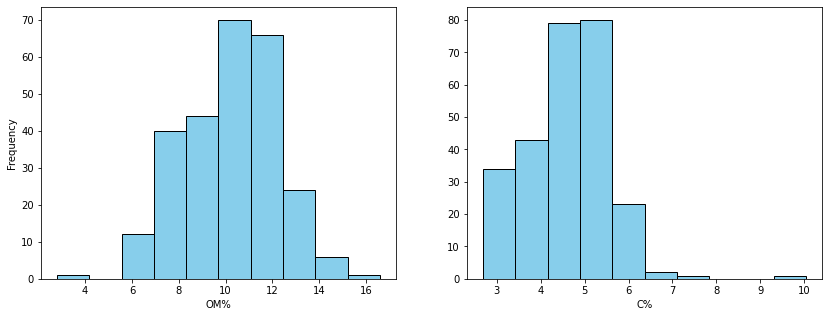

In [29]:
# Plot OM% and C% distribution
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
field_2012['OM_%w/w'].plot(kind = 'hist', ec = 'black', color = 'skyblue')
plt.xlabel('OM%')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
field_2012['C_total_%w/w'].plot(kind = 'hist', ec = 'black',color = 'skyblue')
plt.xlabel('C%')
plt.ylabel('')
plt.show()

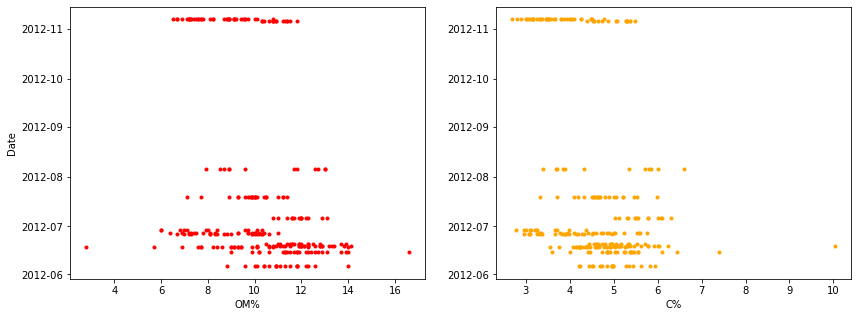

In [38]:
# Plot samples per date
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.plot(field_2012['OM_%w/w'], field_2012['Sample_date'], 'o', color = 'red', markersize=3)
plt.xlabel('OM%')
plt.ylabel('Date')

plt.subplot(1, 2, 2)
plt.plot(field_2012['C_total_%w/w'], field_2012['Sample_date'], 'o', color = 'orange', markersize=3)
plt.xlabel('C%')
plt.ylabel('')

plt.show()

In [14]:
# Check duplicates using the XY coordinates (Easting-Northing)
bool_series = field_2012[['Easting', 'Northing']].duplicated()
print(bool_series.tolist())

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

In [41]:
# Check NAs in OM% and C%
print('There are {} null values in the OM% column'.format(field_2012['OM_%w/w'].isna().sum()))
print('There are {} null values in the C% column'.format(field_2012['C_total_%w/w'].isna().sum()))

There are 0 null values in the OM% column
There are 1 null values in the C% column


In [42]:
# Drop NA from C% column
field_2012.dropna(subset = 'C_total_%w/w', inplace = True)

In [43]:
# Check dataset again
field_2012.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 0 to 263
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Experiment_Id        263 non-null    object        
 1   SP_ID                263 non-null    int64         
 2   sample_distance (m)  263 non-null    int64         
 3   Field                263 non-null    object        
 4   Sample_date          263 non-null    datetime64[ns]
 5   Sample_time          263 non-null    object        
 6   Easting              263 non-null    int64         
 7   Northing             263 non-null    int64         
 8   pH                   263 non-null    float64       
 9   BD_gcm3              263 non-null    float64       
 10  OM_%w/w              263 non-null    float64       
 11  N_total_%w/w         263 non-null    float64       
 12  C_total_%w/w         263 non-null    float64       
dtypes: datetime64[ns](1), float64(5), i

### Year 2013

In [44]:
## Load data
field_2013 = pd.read_csv('Field Survey Data_Format 1_Soil Survey_2013-01-01_2013-12-31.csv')

In [ ]:
# Check columns
field_2013.columns.tolist()

In [45]:
# Columns to drop
drop_columns_2013 = ['comments','pH Quality', 'pH Quality Last Modified', 'SOM Quality', 'SOM Quality Last Modified', 
                     'Total-N Quality', 'Total-N Quality Last Modified', 'Total-C Quality', 'Total-C Quality Last Modified',
                    'Flume', 'GPS_Sample_Nr', 'Start_Sample_Date']

In [46]:
# Dictionary with names
dict_names_2013 = {'SOM (% of DM)': 'OM_%w/w', 
                   'Total-N (% of DM)': 'N_total_%w/w', 'Total-C (% of DM)': 'C_total_%w/w'}

In [47]:
# Drop columns
field_2013.drop(drop_columns_2013, axis = 1 , inplace = True)

In [48]:
# Rename columns
field_2013.rename(columns = dict_names_2013, inplace = True)

In [52]:
# Aglimpse on the data
field_2013.head()

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Sample_time,Easting,Northing,pH,OM_%w/w,N_total_%w/w,C_total_%w/w
0,FP008,1041,25,Longlands South,01/06/2013,12:00:00,265943,98700,5.57,11.9869,0.421,3.891
1,FP008,1042,25,Longlands South,01/06/2013,12:00:00,265863,98683,5.59,15.0689,0.521,4.966
2,FP008,1043,25,Longlands South,01/06/2013,12:00:00,265875,98675,5.57,13.1185,0.459,4.035
3,FP008,1044,25,Longlands South,01/06/2013,12:00:00,265900,98675,5.68,11.8098,0.425,3.705
4,FP008,1045,25,Longlands South,01/06/2013,12:00:00,265925,98675,5.53,12.8909,0.460,4.301


In [50]:
field_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Experiment_Id        423 non-null    object 
 1   SP_ID                423 non-null    int64  
 2   sample_distance (m)  423 non-null    int64  
 3   Field                423 non-null    object 
 4   Sample_date          423 non-null    object 
 5   Sample_time          423 non-null    object 
 6   Easting              423 non-null    int64  
 7   Northing             423 non-null    int64  
 8   pH                   423 non-null    float64
 9   OM_%w/w              89 non-null     float64
 10  N_total_%w/w         89 non-null     float64
 11  C_total_%w/w         89 non-null     float64
dtypes: float64(4), int64(4), object(4)
memory usage: 39.8+ KB


In [53]:
# Convert object to datetime
field_2013['Sample_date'] = pd.to_datetime(field_2013['Sample_date'])

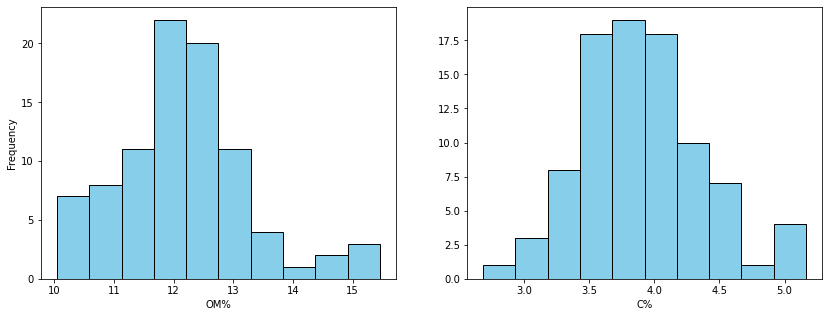

In [55]:
# Plot OM% and C% distribution
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
field_2013['OM_%w/w'].plot(kind = 'hist', ec = 'black', color = 'skyblue')
plt.xlabel('OM%')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
field_2013['C_total_%w/w'].plot(kind = 'hist', ec = 'black',color = 'skyblue')
plt.xlabel('C%')
plt.ylabel('')
plt.show()

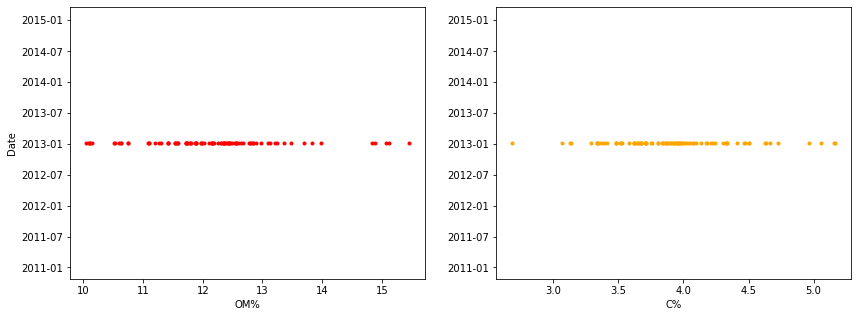

In [56]:
# Plot samples per date
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.plot(field_2013['OM_%w/w'], field_2013['Sample_date'], 'o', color = 'red', markersize=3)
plt.xlabel('OM%')
plt.ylabel('Date')

plt.subplot(1, 2, 2)
plt.plot(field_2013['C_total_%w/w'], field_2013['Sample_date'], 'o', color = 'orange', markersize=3)
plt.xlabel('C%')
plt.ylabel('')

plt.show()

In [29]:
# Check duplicates
bool_series_13 = field_2013[['Sample_date', 'Easting', 'Northing']].duplicated()
print(bool_series_13.tolist())

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

In [57]:
# Check NAs in OM% and C%
print('There are {} null values in the OM% column'.format(field_2013['OM_%w/w'].isna().sum()))
print('There are {} null values in the C% column'.format(field_2013['C_total_%w/w'].isna().sum()))

There are 334 null values in the OM% column
There are 334 null values in the C% column


In [58]:
field_2013.dropna(subset = 'OM_%w/w', inplace = True)
field_2013.dropna(subset = 'C_total_%w/w', inplace = True)

In [61]:
# Check dataset again
field_2013.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 0 to 88
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Experiment_Id        89 non-null     object        
 1   SP_ID                89 non-null     int64         
 2   sample_distance (m)  89 non-null     int64         
 3   Field                89 non-null     object        
 4   Sample_date          89 non-null     datetime64[ns]
 5   Sample_time          89 non-null     object        
 6   Easting              89 non-null     int64         
 7   Northing             89 non-null     int64         
 8   pH                   89 non-null     float64       
 9   OM_%w/w              89 non-null     float64       
 10  N_total_%w/w         89 non-null     float64       
 11  C_total_%w/w         89 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(4), object(3)
memory usage: 9.0+ KB


### Year 2016

In [62]:
## Load data
field_2016 = pd.read_csv('Field Survey Data_Format 1_Soil Survey_2016-01-01_2016-12-31.csv')

In [ ]:
# Check columns
field_2016.columns

In [63]:
# Columns to keep
columns_to_keep = ['Experiment_Id','SP_ID','sample_distance (m)','Field','Sample_date','Sample_time', 
                   'Easting','Northing','pH','Bulk density (g/cm3)',
                   'SOM (% of DM)', 'Total-N (% of DM)', 'Total-C (% of DM)']

In [64]:
# Drop other columns
field_2016 = field_2016[columns_to_keep]

In [65]:
# Dictionary with names
dict_names_2016 = {'Bulk density (g/cm3)':'BD_gcm3', 'SOM (% of DM)': 'OM_%w/w', 
                   'Total-N (% of DM)': 'N_total_%w/w', 'Total-C (% of DM)': 'C_total_%w/w'}

In [66]:
# Rename columns
field_2016.rename(columns = dict_names_2016, inplace = True)

In [67]:
# A glimpse on the data
field_2016.head()

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Sample_time,Easting,Northing,pH,BD_gcm3,OM_%w/w,N_total_%w/w,C_total_%w/w
0,FP059,1,50,Pecketsford,14/07/2016,16:24:00,265631.6521,99300.30838,5.60,0.56,12.9,0.525,5.390
1,FP059,2,50,Pecketsford,14/07/2016,16:20:00,265625.0000,99275.00000,5.41,0.70,10.6,0.446,4.280
2,FP059,7,50,Pecketsford,14/07/2016,16:09:00,265575.0000,99225.00000,5.49,1.06,9.7,0.404,3.667
3,FP059,9,50,Pecketsford,14/07/2016,16:15:00,265625.0000,99225.00000,5.28,1.05,10.2,0.424,4.100
4,FP059,17,50,Pecketsford,14/07/2016,16:04:00,265575.0000,99175.00000,5.51,1.05,10.0,0.403,3.885


In [68]:
# Info
field_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Experiment_Id        396 non-null    object 
 1   SP_ID                396 non-null    int64  
 2   sample_distance (m)  396 non-null    int64  
 3   Field                396 non-null    object 
 4   Sample_date          396 non-null    object 
 5   Sample_time          396 non-null    object 
 6   Easting              396 non-null    float64
 7   Northing             396 non-null    float64
 8   pH                   347 non-null    float64
 9   BD_gcm3              392 non-null    float64
 10  OM_%w/w              348 non-null    float64
 11  N_total_%w/w         348 non-null    float64
 12  C_total_%w/w         348 non-null    float64
dtypes: float64(7), int64(2), object(4)
memory usage: 40.3+ KB


In [69]:
# Convert object to datetime
field_2016['Sample_date'] = pd.to_datetime(field_2016['Sample_date'])

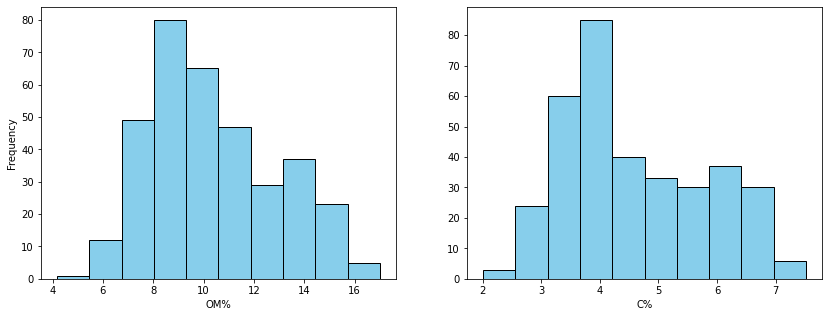

In [70]:
# Plot OM% and C% distribution
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
field_2016['OM_%w/w'].plot(kind = 'hist', ec = 'black', color = 'skyblue')
plt.xlabel('OM%')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
field_2016['C_total_%w/w'].plot(kind = 'hist', ec = 'black',color = 'skyblue')
plt.xlabel('C%')
plt.ylabel('')
plt.show()

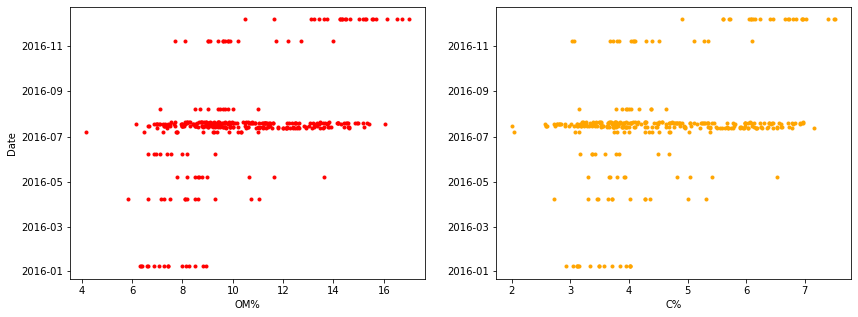

In [71]:
# Plot samples per date
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.plot(field_2016['OM_%w/w'], field_2016['Sample_date'], 'o', color = 'red', markersize=3)
plt.xlabel('OM%')
plt.ylabel('Date')

plt.subplot(1, 2, 2)
plt.plot(field_2016['C_total_%w/w'], field_2016['Sample_date'], 'o', color = 'orange', markersize=3)
plt.xlabel('C%')
plt.ylabel('')

plt.show()

In [48]:
# Check duplicates
bool_series_16 = field_2016[['Sample_date','Easting', 'Northing']].duplicated()
print(bool_series_16.tolist())

[False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,

In [72]:
# Check NAs in OM% and C%
print('There are {} null values in the OM% column'.format(field_2016['OM_%w/w'].isna().sum()))
print('There are {} null values in the C% column'.format(field_2016['C_total_%w/w'].isna().sum()))

There are 48 null values in the OM% column
There are 48 null values in the C% column


In [73]:
# Drop NAs
field_2016.dropna(subset = 'OM_%w/w', inplace = True)
field_2016.dropna(subset = 'C_total_%w/w', inplace = True)

In [74]:
# Check dataset again
field_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 395
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Experiment_Id        348 non-null    object        
 1   SP_ID                348 non-null    int64         
 2   sample_distance (m)  348 non-null    int64         
 3   Field                348 non-null    object        
 4   Sample_date          348 non-null    datetime64[ns]
 5   Sample_time          348 non-null    object        
 6   Easting              348 non-null    float64       
 7   Northing             348 non-null    float64       
 8   pH                   347 non-null    float64       
 9   BD_gcm3              344 non-null    float64       
 10  OM_%w/w              348 non-null    float64       
 11  N_total_%w/w         348 non-null    float64       
 12  C_total_%w/w         348 non-null    float64       
dtypes: datetime64[ns](1), float64(7), i

### Year 2018

In [75]:
## Load data
field_2018 = pd.read_csv('Field Survey Data_Format 1_Soil Survey_2018-01-01_2018-12-31.csv')

In [ ]:
# Check columns
field_2018.columns

In [76]:
# Columns to keep
columns_to_keep2018 = ['Experiment_Id', 'SP_ID', 'sample_distance (m)', 'Field', 'Sample_date', 'Sample_time',
                       'Easting', 'Northing', 'pH','Conductivity (uS/cm)', 'Organic matter LOI (%w/w)', 'Total N (%w/w) Soil',
                      'Total C (%w/w) Soil']

In [77]:
# Keep the columns
field_2018 = field_2018[columns_to_keep2018]

In [78]:
# Dictionary with column names
dict_names_2018 = {'Conductivity (uS/cm)':'conductivity_uScm', 'Organic matter LOI (%w/w)': 'OM_%w/w', 
                   'Total N (%w/w) Soil': 'N_total_%w/w', 'Total C (%w/w) Soil': 'C_total_%w/w'}

In [79]:
# Rename columns
field_2018.rename(columns = dict_names_2018 , inplace = True)

In [80]:
# A glimpse on the data
field_2018.head()

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Sample_time,Easting,Northing,pH,conductivity_uScm,OM_%w/w,N_total_%w/w,C_total_%w/w
0,NW686-SP,19,NaN,Pecketsford,16/04/2018,12:01:00,265675.48,99082.77,NaN,NaN,NaN,NaN,NaN
1,NW686-SP,19,NaN,Pecketsford,16/04/2018,12:02:00,265592.76,99019.42,NaN,NaN,NaN,NaN,NaN
2,NW686-SP,19,NaN,Pecketsford,16/04/2018,12:03:00,265616.49,99071.76,NaN,NaN,NaN,NaN,NaN
3,NW686-SP,19,NaN,Pecketsford,16/04/2018,12:04:00,265677.84,99122.84,NaN,NaN,NaN,NaN,NaN
4,NW686-SP,19,NaN,Pecketsford,16/04/2018,12:05:00,265638.23,99138.69,NaN,NaN,NaN,NaN,NaN


In [81]:
# Info
field_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Experiment_Id        294 non-null    object 
 1   SP_ID                294 non-null    int64  
 2   sample_distance (m)  0 non-null      float64
 3   Field                294 non-null    object 
 4   Sample_date          294 non-null    object 
 5   Sample_time          294 non-null    object 
 6   Easting              294 non-null    float64
 7   Northing             294 non-null    float64
 8   pH                   84 non-null     float64
 9   conductivity_uScm    80 non-null     float64
 10  OM_%w/w              84 non-null     float64
 11  N_total_%w/w         84 non-null     float64
 12  C_total_%w/w         84 non-null     float64
dtypes: float64(8), int64(1), object(4)
memory usage: 30.0+ KB


In [82]:
# Convert object to datetime
field_2018['Sample_date'] = pd.to_datetime(field_2018['Sample_date'])

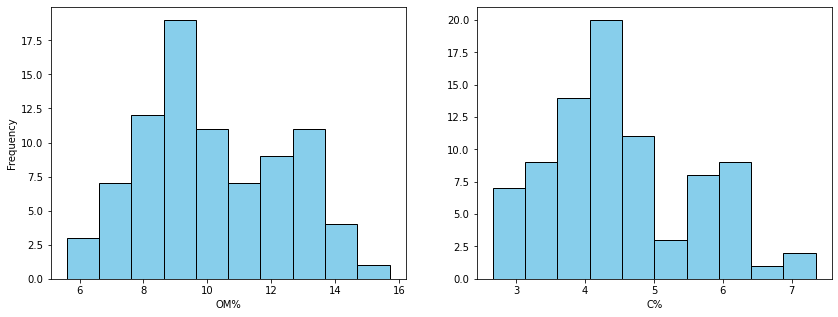

In [83]:
# Plot OM% and C% distribution
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
field_2018['OM_%w/w'].plot(kind = 'hist', ec = 'black', color = 'skyblue')
plt.xlabel('OM%')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
field_2018['C_total_%w/w'].plot(kind = 'hist', ec = 'black',color = 'skyblue')
plt.xlabel('C%')
plt.ylabel('')
plt.show()

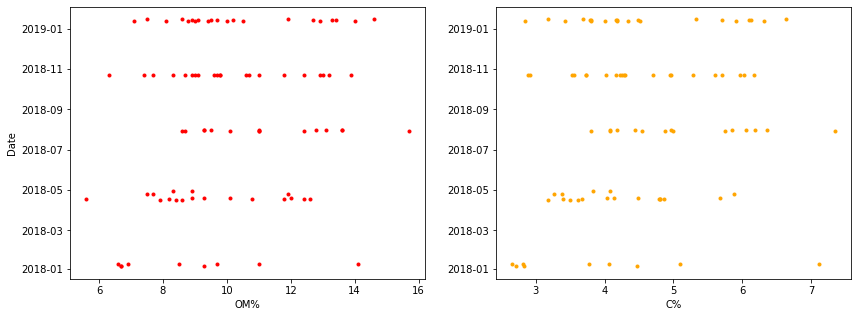

In [84]:
# Plot samples per date
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.plot(field_2018['OM_%w/w'], field_2018['Sample_date'], 'o', color = 'red', markersize=3)
plt.xlabel('OM%')
plt.ylabel('Date')

plt.subplot(1, 2, 2)
plt.plot(field_2018['C_total_%w/w'], field_2018['Sample_date'], 'o', color = 'orange', markersize=3)
plt.xlabel('C%')
plt.ylabel('')

plt.show()

In [62]:
# Check duplicates
bool_series_18 = field_2018[['Sample_date','Easting', 'Northing']].duplicated()
print(bool_series_18.tolist())

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

In [85]:
# Check NAs in OM% and C%
print('There are {} null values in the OM% column'.format(field_2018['OM_%w/w'].isna().sum()))
print('There are {} null values in the C% column'.format(field_2018['C_total_%w/w'].isna().sum()))

There are 210 null values in the OM% column
There are 210 null values in the C% column


In [86]:
# Drop NAs
field_2018.dropna(subset = 'OM_%w/w', inplace = True)
field_2018.dropna(subset = 'C_total_%w/w', inplace = True)

In [87]:
# Check dataset again
field_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 210 to 293
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Experiment_Id        84 non-null     object        
 1   SP_ID                84 non-null     int64         
 2   sample_distance (m)  0 non-null      float64       
 3   Field                84 non-null     object        
 4   Sample_date          84 non-null     datetime64[ns]
 5   Sample_time          84 non-null     object        
 6   Easting              84 non-null     float64       
 7   Northing             84 non-null     float64       
 8   pH                   84 non-null     float64       
 9   conductivity_uScm    80 non-null     float64       
 10  OM_%w/w              84 non-null     float64       
 11  N_total_%w/w         84 non-null     float64       
 12  C_total_%w/w         84 non-null     float64       
dtypes: datetime64[ns](1), float64(8), 

### Year 2019

In [88]:
## Load data
field_2019 = pd.read_csv('Field Survey Data_Format 1_Soil Survey_2019-01-01_2019-12-31.csv')

In [ ]:
# Check columns
field_2019.columns.tolist()

In [89]:
# Columns to keep
columns_to_keep2019 = ['Experiment_Id', 'SP_ID', 'sample_distance (m)', 'Field', 'Sample_date', 'Sample_time',
                       'Easting', 'Northing', 'pH','Conductivity (uS/cm)', 'Organic matter LOI (%w/w)', 'Total N (%w/w) Soil',
                      'Total C (%w/w) Soil']

In [90]:
# Remobe other columns
field_2019 = field_2019[columns_to_keep2019]

In [92]:
# Dictionary with column names
dict_names_2019 = {'Conductivity (uS/cm)':'conductivity_uScm', 'Organic matter LOI (%w/w)': 'OM_%w/w', 
                   'Total N (%w/w) Soil': 'N_total_%w/w', 'Total C (%w/w) Soil': 'C_total_%w/w'}

In [93]:
# Rename columns
field_2019.rename(columns = dict_names_2019, inplace = True)

In [94]:
# A glimpse on the dataset
field_2019.head()

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Sample_time,Easting,Northing,pH,conductivity_uScm,OM_%w/w,N_total_%w/w,C_total_%w/w
0,NW702-SP,19,NaN,Pecketsford,18/03/2019,12:01:00,265650.7,99239.591,NaN,NaN,NaN,NaN,NaN
1,NW702-SP,19,NaN,Pecketsford,18/03/2019,12:02:00,265576.3,99180.488,NaN,NaN,NaN,NaN,NaN
2,NW702-SP,19,NaN,Pecketsford,18/03/2019,12:03:00,265572.8,99122.300,NaN,NaN,NaN,NaN,NaN
3,NW702-SP,19,NaN,Pecketsford,18/03/2019,12:04:00,265617.2,99169.389,NaN,NaN,NaN,NaN,NaN
4,NW702-SP,19,NaN,Pecketsford,18/03/2019,12:05:00,265659.1,99203.655,NaN,NaN,NaN,NaN,NaN


In [95]:
# Info
field_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Experiment_Id        403 non-null    object 
 1   SP_ID                403 non-null    int64  
 2   sample_distance (m)  27 non-null     float64
 3   Field                403 non-null    object 
 4   Sample_date          403 non-null    object 
 5   Sample_time          403 non-null    object 
 6   Easting              403 non-null    float64
 7   Northing             403 non-null    float64
 8   pH                   166 non-null    float64
 9   conductivity_uScm    162 non-null    float64
 10  OM_%w/w              166 non-null    float64
 11  N_total_%w/w         166 non-null    float64
 12  C_total_%w/w         166 non-null    float64
dtypes: float64(8), int64(1), object(4)
memory usage: 41.1+ KB


In [96]:
# Convert object to datetime
field_2019['Sample_date'] = pd.to_datetime(field_2019['Sample_date'])

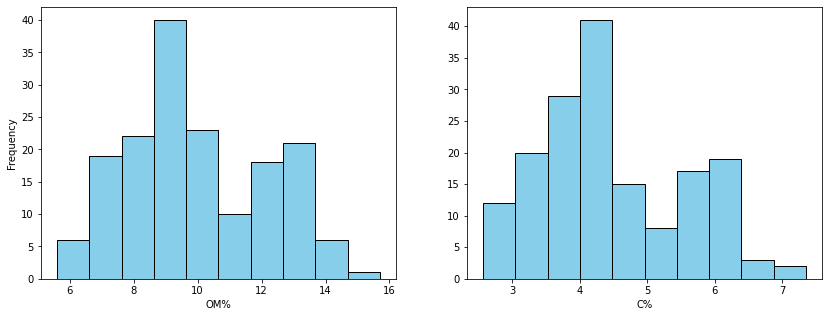

In [97]:
# Plot OM% and C% distribution
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
field_2019['OM_%w/w'].plot(kind = 'hist', ec = 'black', color = 'skyblue')
plt.xlabel('OM%')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
field_2019['C_total_%w/w'].plot(kind = 'hist', ec = 'black',color = 'skyblue')
plt.xlabel('C%')
plt.ylabel('')
plt.show()

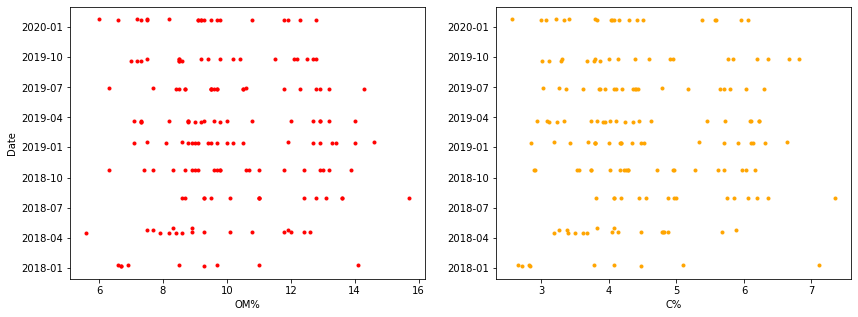

In [98]:
# Plot samples per date
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.plot(field_2019['OM_%w/w'], field_2019['Sample_date'], 'o', color = 'red', markersize=3)
plt.xlabel('OM%')
plt.ylabel('Date')

plt.subplot(1, 2, 2)
plt.plot(field_2019['C_total_%w/w'], field_2019['Sample_date'], 'o', color = 'orange', markersize=3)
plt.xlabel('C%')
plt.ylabel('')

plt.show()

In [80]:
# Check duplicates
bool_series_19 = field_2019[['Sample_date','Easting', 'Northing']].duplicated()
print(bool_series_19.tolist())

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

In [99]:
# Check NAs in OM% and C%
print('There are {} null values in the OM% column'.format(field_2019['OM_%w/w'].isna().sum()))
print('There are {} null values in the C% column'.format(field_2019['C_total_%w/w'].isna().sum()))

There are 237 null values in the OM% column
There are 237 null values in the C% column


In [101]:
# Drop NAs
field_2019.dropna(subset = 'OM_%w/w', inplace = True)
field_2019.dropna(subset = 'C_total_%w/w', inplace = True)

In [102]:
# Check dataset again
field_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 237 to 402
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Experiment_Id        166 non-null    object        
 1   SP_ID                166 non-null    int64         
 2   sample_distance (m)  0 non-null      float64       
 3   Field                166 non-null    object        
 4   Sample_date          166 non-null    datetime64[ns]
 5   Sample_time          166 non-null    object        
 6   Easting              166 non-null    float64       
 7   Northing             166 non-null    float64       
 8   pH                   166 non-null    float64       
 9   conductivity_uScm    162 non-null    float64       
 10  OM_%w/w              166 non-null    float64       
 11  N_total_%w/w         166 non-null    float64       
 12  C_total_%w/w         166 non-null    float64       
dtypes: datetime64[ns](1), float64(8),

### Year 2020

In [103]:
## Load data
field_2020 = pd.read_csv('Field Survey Data_Format 1_Soil Survey_2020-01-01_2020-12-31.csv')

In [ ]:
# Check the columns
field_2020.columns

In [104]:
# Columns to keep
columns_to_keep2020 = ['Experiment_Id', 'SP_ID', 'sample_distance (m)', 'Field', 'Sample_date', 'Sample_time',
                       'Easting', 'Northing', 'pH','Conductivity (uS/cm)', 'Organic matter LOI (%w/w)', 'Total N (%w/w) Soil',
                      'Total C (%w/w) Soil']

In [105]:
# Dictionary with names
dict_names_2020 = {'Conductivity (uS/cm)':'conductivity_uScm', 'Organic matter LOI (%w/w)': 'OM_%w/w', 
                   'Total N (%w/w) Soil': 'N_total_%w/w', 'Total C (%w/w) Soil': 'C_total_%w/w'}

In [106]:
# Remove other columns
field_2020 = field_2020[columns_to_keep2020]

In [107]:
# Rename columns
field_2020.rename(columns = dict_names_2020, inplace = True)

In [108]:
# A glimpse on the dataset
field_2020.head()

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Sample_time,Easting,Northing,pH,conductivity_uScm,OM_%w/w,N_total_%w/w,C_total_%w/w
0,NW702-S,19,NaN,Pecketsford,18/03/2019,12:00:00,265618.86,99134.54,6.3,2047,9.2,0.412,4.24
1,NW702-S,68,NaN,Little Pecketsford,18/03/2019,12:00:00,265698.45,99004.41,6.0,2041,7.3,0.342,3.23
2,NW702-S,2002,NaN,Great Field,18/03/2019,12:00:00,265690.12,98829.40,6.0,2020,8.8,0.394,3.94
3,NW702-S,2004,NaN,Ware Park,19/03/2019,12:00:00,265791.65,98584.10,6.0,2025,7.3,0.322,3.12
4,NW702-S,2003,NaN,Poor Field,19/03/2019,12:00:00,265547.77,98594.88,6.1,2017,9.8,0.423,4.35


In [109]:
# Info
field_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Experiment_Id        142 non-null    object 
 1   SP_ID                142 non-null    int64  
 2   sample_distance (m)  0 non-null      float64
 3   Field                142 non-null    object 
 4   Sample_date          142 non-null    object 
 5   Sample_time          142 non-null    object 
 6   Easting              142 non-null    float64
 7   Northing             142 non-null    float64
 8   pH                   142 non-null    float64
 9   conductivity_uScm    142 non-null    int64  
 10  OM_%w/w              142 non-null    float64
 11  N_total_%w/w         142 non-null    float64
 12  C_total_%w/w         142 non-null    float64
dtypes: float64(7), int64(2), object(4)
memory usage: 14.5+ KB


In [110]:
# Convert object to datetime
field_2020['Sample_date'] = pd.to_datetime(field_2020['Sample_date'])

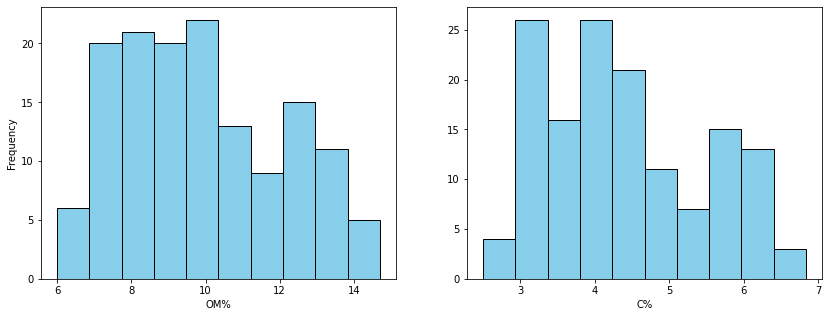

In [111]:
# Plot OM% and C% distribution
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
field_2020['OM_%w/w'].plot(kind = 'hist', ec = 'black', color = 'skyblue')
plt.xlabel('OM%')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
field_2020['C_total_%w/w'].plot(kind = 'hist', ec = 'black',color = 'skyblue')
plt.xlabel('C%')
plt.ylabel('')
plt.show()

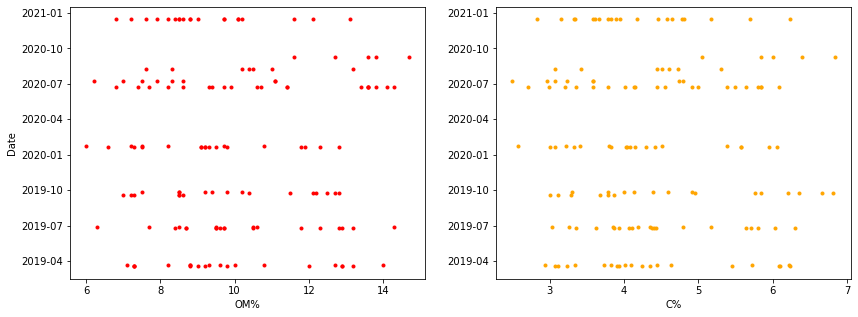

In [112]:
# Plot samples per date
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.plot(field_2020['OM_%w/w'], field_2020['Sample_date'], 'o', color = 'red', markersize=3)
plt.xlabel('OM%')
plt.ylabel('Date')

plt.subplot(1, 2, 2)
plt.plot(field_2020['C_total_%w/w'], field_2020['Sample_date'], 'o', color = 'orange', markersize=3)
plt.xlabel('C%')
plt.ylabel('')

plt.show()

In [96]:
# Check duplicates
bool_series_20 = field_2020[['Sample_date','Easting', 'Northing']].duplicated()
print(bool_series_20.tolist())

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


In [113]:
# Check NAs in OM% and C%
print('There are {} null values in the OM% column'.format(field_2020['OM_%w/w'].isna().sum()))
print('There are {} null values in the C% column'.format(field_2020['C_total_%w/w'].isna().sum()))

There are 0 null values in the OM% column
There are 0 null values in the C% column


In [114]:
# Check dataset again
field_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Experiment_Id        142 non-null    object        
 1   SP_ID                142 non-null    int64         
 2   sample_distance (m)  0 non-null      float64       
 3   Field                142 non-null    object        
 4   Sample_date          142 non-null    datetime64[ns]
 5   Sample_time          142 non-null    object        
 6   Easting              142 non-null    float64       
 7   Northing             142 non-null    float64       
 8   pH                   142 non-null    float64       
 9   conductivity_uScm    142 non-null    int64         
 10  OM_%w/w              142 non-null    float64       
 11  N_total_%w/w         142 non-null    float64       
 12  C_total_%w/w         142 non-null    float64       
dtypes: datetime64[ns](1), float64(7), i

### Year 2021

In [115]:
## Load data
field_2021 = pd.read_csv('Field Survey Data_Format 1_Soil Survey_2021-01-01_2021-12-31.csv')

In [ ]:
# Check the columns
field_2021.columns

In [116]:
# Columns to keep
columns_to_keep2021 = ['Experiment_Id', 'SP_ID', 'sample_distance (m)', 'Field',  'Sample_date', 'Sample_time',
                       'Easting', 'Northing', 'pH','Conductivity (uS/cm)', 'Organic matter LOI (%w/w)', 'Total N (%w/w) Soil',
                      'Total C (%w/w) Soil']

In [117]:
# Dictionary with names
dict_names_2021 = {'Conductivity (uS/cm)':'conductivity_uScm', 'Organic matter LOI (%w/w)': 'OM_%w/w', 
                   'Total N (%w/w) Soil': 'N_total_%w/w', 'Total C (%w/w) Soil': 'C_total_%w/w'}

In [118]:
# Remove other columns
field_2021 = field_2021[columns_to_keep2021]

In [119]:
# Rename columns
field_2021.rename(columns = dict_names_2021, inplace = True)

In [120]:
# A glimpse on the dataset
field_2021.head()

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Sample_time,Easting,Northing,pH,conductivity_uScm,OM_%w/w,N_total_%w/w,C_total_%w/w
0,NW752-2SP-1,2011,NaN,Higher Wyke Moor,03/09/2021,12:00:00,266114.792,97558.471,NaN,NaN,NaN,NaN,NaN
1,NW752-2SP-1,2012,NaN,Middle Wyke Moor,03/09/2021,12:00:00,266371.050,97681.779,NaN,NaN,NaN,NaN,NaN
2,NW752-2SP-1,2010,NaN,Lower Wyke Moor,14/09/2021,12:00:00,266432.495,97871.352,NaN,NaN,NaN,NaN,NaN
3,NW752-2SP-1,2013,NaN,Dairy South,14/09/2021,12:00:00,266062.963,98059.804,NaN,NaN,NaN,NaN,NaN
4,NW752-2SP-1,2016,NaN,Dairy East,13/09/2021,12:00:00,266285.532,98180.026,NaN,NaN,NaN,NaN,NaN


In [121]:
# Convert object to datetime
field_2021['Sample_date'] = pd.to_datetime(field_2021['Sample_date'])

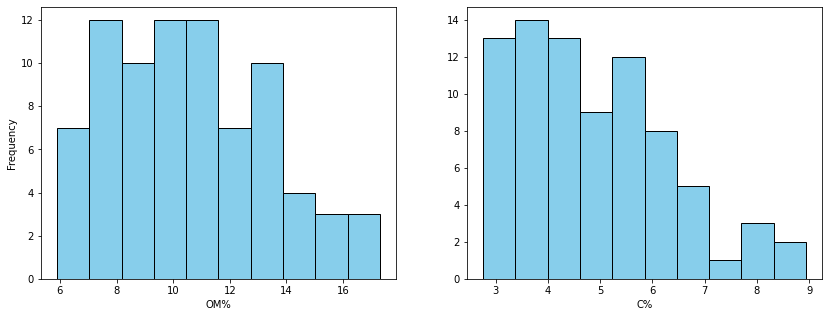

In [122]:
# Plot OM% and C% distribution
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
field_2021['OM_%w/w'].plot(kind = 'hist', ec = 'black', color = 'skyblue')
plt.xlabel('OM%')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
field_2021['C_total_%w/w'].plot(kind = 'hist', ec = 'black',color = 'skyblue')
plt.xlabel('C%')
plt.ylabel('')
plt.show()

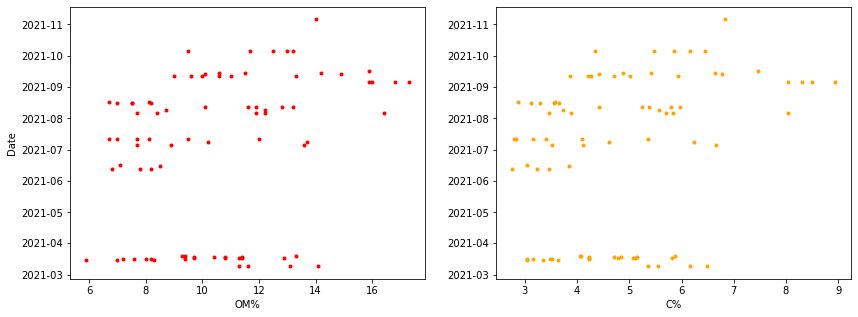

In [123]:
# Plot samples per date
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.plot(field_2021['OM_%w/w'], field_2021['Sample_date'], 'o', color = 'red', markersize=3)
plt.xlabel('OM%')
plt.ylabel('Date')

plt.subplot(1, 2, 2)
plt.plot(field_2021['C_total_%w/w'], field_2021['Sample_date'], 'o', color = 'orange', markersize=3)
plt.xlabel('C%')
plt.ylabel('')

plt.show()

In [136]:
# Check duplicates
bool_series_21 = field_2021[['Sample_date','Easting', 'Northing']].duplicated()
print(bool_series_21.tolist())

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


In [124]:
# Check NAs in OM% and C%
print('There are {} null values in the OM% column'.format(field_2021['OM_%w/w'].isna().sum()))
print('There are {} null values in the C% column'.format(field_2021['C_total_%w/w'].isna().sum()))

There are 126 null values in the OM% column
There are 126 null values in the C% column


In [125]:
# Drop NA
field_2021.dropna(subset = 'OM_%w/w', inplace = True)
field_2021.dropna(subset = 'C_total_%w/w', inplace = True)

In [126]:
# Check dataset again
field_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 126 to 205
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Experiment_Id        80 non-null     object        
 1   SP_ID                80 non-null     int64         
 2   sample_distance (m)  0 non-null      float64       
 3   Field                80 non-null     object        
 4   Sample_date          80 non-null     datetime64[ns]
 5   Sample_time          80 non-null     object        
 6   Easting              80 non-null     float64       
 7   Northing             80 non-null     float64       
 8   pH                   80 non-null     float64       
 9   conductivity_uScm    80 non-null     float64       
 10  OM_%w/w              80 non-null     float64       
 11  N_total_%w/w         80 non-null     float64       
 12  C_total_%w/w         80 non-null     float64       
dtypes: datetime64[ns](1), float64(8), 

### Joining all the datasets

In [128]:
# Create a list with 
list_df = [field_2012, field_2013, field_2016, field_2018, field_2019, field_2020, field_2021]

In [129]:
# Concatenate the list
result_df = pd.concat(list_df)

In [130]:
result_df.shape

(1172, 14)

In [131]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1172 entries, 0 to 205
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Experiment_Id        1172 non-null   object        
 1   SP_ID                1172 non-null   int64         
 2   sample_distance (m)  700 non-null    float64       
 3   Field                1172 non-null   object        
 4   Sample_date          1172 non-null   datetime64[ns]
 5   Sample_time          1172 non-null   object        
 6   Easting              1172 non-null   float64       
 7   Northing             1172 non-null   float64       
 8   pH                   1171 non-null   float64       
 9   BD_gcm3              607 non-null    float64       
 10  OM_%w/w              1172 non-null   float64       
 11  N_total_%w/w         1172 non-null   float64       
 12  C_total_%w/w         1172 non-null   float64       
 13  conductivity_uScm    464 non-null 

In [132]:
# A glimpse on the concatenated data
result_df.head()

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Sample_time,Easting,Northing,pH,BD_gcm3,OM_%w/w,N_total_%w/w,C_total_%w/w,conductivity_uScm
0,FP003,1,50.0,Pecketsford,2012-06-06,12:00:00,265632.0,99300.0,5.18,0.916,10.1,0.51,4.742,NaN
1,FP003,2,50.0,Pecketsford,2012-06-06,12:00:00,265625.0,99275.0,5.23,0.943,10.4,0.55,4.980,NaN
2,FP003,7,50.0,Pecketsford,2012-06-06,12:00:00,265575.0,99225.0,5.54,0.948,11.8,0.64,5.610,NaN
3,FP003,9,50.0,Pecketsford,2012-06-06,12:00:00,265625.0,99225.0,5.12,0.857,10.9,0.54,4.510,NaN
4,FP003,17,50.0,Pecketsford,2012-06-06,12:00:00,265575.0,99175.0,5.68,0.946,11.5,0.59,5.340,NaN


In [133]:
# Check duplicates
result_df['duplicated'] = result_df[['Sample_date','Easting', 'Northing']].duplicated()

In [135]:
# A glimpse on the concatenated data
result_df

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Sample_time,Easting,Northing,pH,BD_gcm3,OM_%w/w,N_total_%w/w,C_total_%w/w,conductivity_uScm,duplicated
0,FP003,1,50.0,Pecketsford,2012-06-06,12:00:00,265632.0000,99300.00000,5.18,0.916,10.1,0.510,4.742,NaN,False
1,FP003,2,50.0,Pecketsford,2012-06-06,12:00:00,265625.0000,99275.00000,5.23,0.943,10.4,0.550,4.980,NaN,False
2,FP003,7,50.0,Pecketsford,2012-06-06,12:00:00,265575.0000,99225.00000,5.54,0.948,11.8,0.640,5.610,NaN,False
3,FP003,9,50.0,Pecketsford,2012-06-06,12:00:00,265625.0000,99225.00000,5.12,0.857,10.9,0.540,4.510,NaN,False
4,FP003,17,50.0,Pecketsford,2012-06-06,12:00:00,265575.0000,99175.00000,5.68,0.946,11.5,0.590,5.340,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,NW752-3S,2009,NaN,Golden Rove,2021-08-12,12:00:00,265953.4417,97967.65381,5.80,NaN,11.6,0.549,5.240,2012.0,False
202,NW752-3S,2007,NaN,Orchard Dean North,2021-08-12,12:00:00,265678.1911,98112.25632,5.90,NaN,13.2,0.629,5.970,2014.0,False
203,NW752-3S,2008,NaN,Orchard Dean South,2021-08-12,12:00:00,265666.1468,98008.84146,5.80,NaN,11.9,0.580,5.370,2018.0,False
204,NW752-3S,2017,NaN,Dairy North,2021-09-12,12:00:00,266282.1266,98358.20591,5.80,NaN,13.3,0.651,5.930,2015.0,False


In [216]:
result_df.to_csv('results_with_duplicates.csv', index = False)

In [136]:
result_df_without_duplicates = result_df[result_df['duplicated'] == False].reset_index(drop = True)

In [137]:
result_df_without_duplicates

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Sample_time,Easting,Northing,pH,BD_gcm3,OM_%w/w,N_total_%w/w,C_total_%w/w,conductivity_uScm,duplicated
0,FP003,1,50.0,Pecketsford,2012-06-06,12:00:00,265632.0000,99300.00000,5.18,0.916,10.1,0.510,4.742,NaN,False
1,FP003,2,50.0,Pecketsford,2012-06-06,12:00:00,265625.0000,99275.00000,5.23,0.943,10.4,0.550,4.980,NaN,False
2,FP003,7,50.0,Pecketsford,2012-06-06,12:00:00,265575.0000,99225.00000,5.54,0.948,11.8,0.640,5.610,NaN,False
3,FP003,9,50.0,Pecketsford,2012-06-06,12:00:00,265625.0000,99225.00000,5.12,0.857,10.9,0.540,4.510,NaN,False
4,FP003,17,50.0,Pecketsford,2012-06-06,12:00:00,265575.0000,99175.00000,5.68,0.946,11.5,0.590,5.340,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,NW752-3S,2009,NaN,Golden Rove,2021-08-12,12:00:00,265953.4417,97967.65381,5.80,NaN,11.6,0.549,5.240,2012.0,False
1001,NW752-3S,2007,NaN,Orchard Dean North,2021-08-12,12:00:00,265678.1911,98112.25632,5.90,NaN,13.2,0.629,5.970,2014.0,False
1002,NW752-3S,2008,NaN,Orchard Dean South,2021-08-12,12:00:00,265666.1468,98008.84146,5.80,NaN,11.9,0.580,5.370,2018.0,False
1003,NW752-3S,2017,NaN,Dairy North,2021-09-12,12:00:00,266282.1266,98358.20591,5.80,NaN,13.3,0.651,5.930,2015.0,False


In [138]:
result_df_without_duplicates.shape

(1005, 15)

In [139]:
# Info
result_df_without_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Experiment_Id        1005 non-null   object        
 1   SP_ID                1005 non-null   int64         
 2   sample_distance (m)  699 non-null    float64       
 3   Field                1005 non-null   object        
 4   Sample_date          1005 non-null   datetime64[ns]
 5   Sample_time          1005 non-null   object        
 6   Easting              1005 non-null   float64       
 7   Northing             1005 non-null   float64       
 8   pH                   1004 non-null   float64       
 9   BD_gcm3              606 non-null    float64       
 10  OM_%w/w              1005 non-null   float64       
 11  N_total_%w/w         1005 non-null   float64       
 12  C_total_%w/w         1005 non-null   float64       
 13  conductivity_uScm    302 non-null

In [140]:
result_df_without_duplicates.drop(columns = ['duplicated'], axis = 1, inplace = True)

In [141]:
# Count the numbers of NAs in C%
result_df_without_duplicates['C_total_%w/w'].isnull().sum()

0

In [142]:
# Count the numbers of NAs in OM%
result_df_without_duplicates['OM_%w/w'].isnull().sum()

0

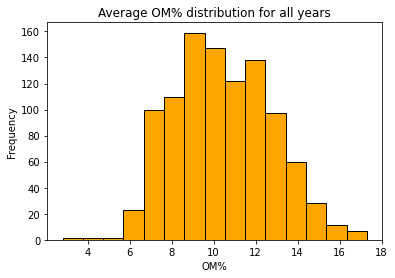

In [143]:
# Plot OM% distribution
result_df_without_duplicates['OM_%w/w'].plot(kind = 'hist', ec = 'black', bins = 15, color = 'orange')
plt.title('Average OM% distribution for all years')
plt.xlabel('OM%')
plt.ylabel('Frequency')
plt.show()

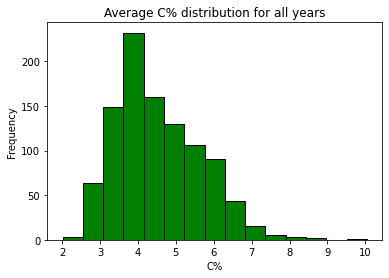

In [144]:
# Plot OM% distribution
result_df_without_duplicates['C_total_%w/w'].plot(kind = 'hist', ec = 'black', bins = 15, color = 'green')
plt.title('Average C% distribution for all years')
plt.xlabel('C%')
plt.ylabel('Frequency')
plt.show()

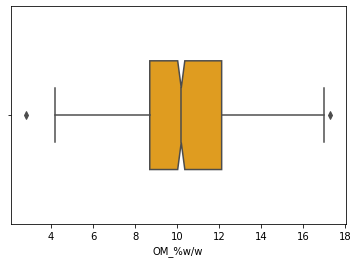

In [145]:
# Plot boxplot
sns.boxplot(result_df_without_duplicates['OM_%w/w'], notch = True, width=0.5, orient = 'h', color = 'orange')
plt.show()

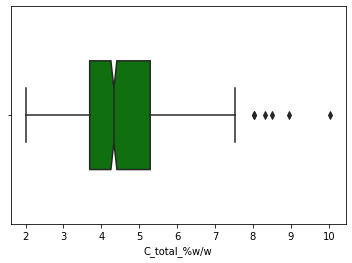

In [146]:
sns.boxplot(result_df_without_duplicates['C_total_%w/w'], notch = True, width=0.5, orient = 'h', color = 'green')
plt.show()

In [147]:
# Group by date and create summary statistics
summary_dat = result_df_without_duplicates.groupby(result_df_without_duplicates['Sample_date'].dt.year)['C_total_%w/w'].agg(['min', 'mean', 'median', 'max','std', 'count']).reset_index()

In [148]:
# A glimpse on the summary statistics
summary_dat

,Sample_date,min,mean,median,max,std,count
0,2012,2.690,4.616015,4.657,10.040,0.928946,263
1,2013,2.685,3.913382,3.891,5.165,0.464701,89
2,2016,2.011,4.575089,4.275,7.519,1.230368,347
3,2018,2.660,4.499365,4.280,7.350,1.096307,63
4,2019,2.840,4.529880,4.190,6.810,1.093772,83
5,2020,2.500,4.344000,4.165,6.840,1.047984,80
6,2021,2.760,4.845125,4.655,8.940,1.483824,80


In [260]:
# Save to csv
summary_dat.to_csv('summary_stats_per_year.csv', index = False)

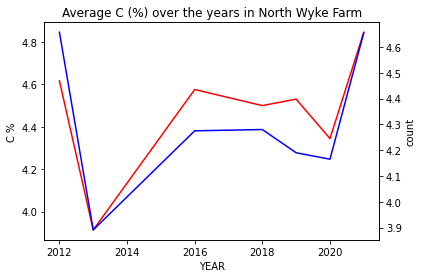

In [149]:
# Plot mean and count per year
fig, ax = plt.subplots()

ax.plot(summary_dat['Sample_date'], summary_dat['mean'], color = 'red')
plt.xlabel('YEAR')
plt.ylabel('C %')

ax2 = ax.twinx()
ax2.plot(summary_dat['Sample_date'], summary_dat['median'], color = 'blue')
plt.ylabel('count')


plt.title('Average C (%) over the years in North Wyke Farm')
plt.show()

In [150]:
# Group by Sample_date and count
group_date = result_df_without_duplicates[['Sample_date', 'C_total_%w/w']].groupby(['Sample_date']).count().reset_index()

In [151]:
# Group by location_date and count
group_loc = result_df_without_duplicates[['Easting','Northing', 'C_total_%w/w']].groupby(['Easting','Northing']).count().reset_index()

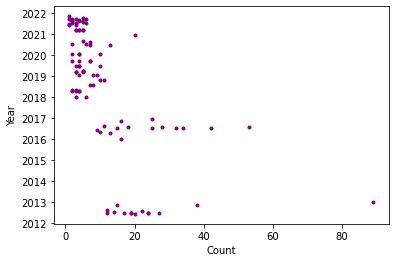

In [152]:
# Plot the count of samples per date
plt.plot(group_date['C_total_%w/w'], group_date['Sample_date'], 'o', color = 'purple', markersize = 3)
plt.xlabel('Count')
plt.ylabel('Year')
plt.show()

In [265]:
# Save to csv
group_date.to_csv('number_samples_per_date.csv')

In [153]:
# Create a new column: MM-YYYYa
month_df = result_df_without_duplicates['Sample_date'].dt.to_period('M')
year_df = result_df_without_duplicates['Sample_date'].dt.to_period('Y')

In [154]:
result_df_without_duplicates.insert(5, 'Month-Year', month_df)
result_df_without_duplicates.insert(6, 'Year', year_df)

In [155]:
result_df_without_duplicates

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Month-Year,Year,Sample_time,Easting,Northing,pH,BD_gcm3,OM_%w/w,N_total_%w/w,C_total_%w/w,conductivity_uScm
0,FP003,1,50.0,Pecketsford,2012-06-06,2012-06,2012,12:00:00,265632.0000,99300.00000,5.18,0.916,10.1,0.510,4.742,NaN
1,FP003,2,50.0,Pecketsford,2012-06-06,2012-06,2012,12:00:00,265625.0000,99275.00000,5.23,0.943,10.4,0.550,4.980,NaN
2,FP003,7,50.0,Pecketsford,2012-06-06,2012-06,2012,12:00:00,265575.0000,99225.00000,5.54,0.948,11.8,0.640,5.610,NaN
3,FP003,9,50.0,Pecketsford,2012-06-06,2012-06,2012,12:00:00,265625.0000,99225.00000,5.12,0.857,10.9,0.540,4.510,NaN
4,FP003,17,50.0,Pecketsford,2012-06-06,2012-06,2012,12:00:00,265575.0000,99175.00000,5.68,0.946,11.5,0.590,5.340,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,NW752-3S,2009,NaN,Golden Rove,2021-08-12,2021-08,2021,12:00:00,265953.4417,97967.65381,5.80,NaN,11.6,0.549,5.240,2012.0
1001,NW752-3S,2007,NaN,Orchard Dean North,2021-08-12,2021-08,2021,12:00:00,265678.1911,98112.25632,5.90,NaN,13.2,0.629,5.970,2014.0
1002,NW752-3S,2008,NaN,Orchard Dean South,2021-08-12,2021-08,2021,12:00:00,265666.1468,98008.84146,5.80,NaN,11.9,0.580,5.370,2018.0
1003,NW752-3S,2017,NaN,Dairy North,2021-09-12,2021-09,2021,12:00:00,266282.1266,98358.20591,5.80,NaN,13.3,0.651,5.930,2015.0


In [196]:
result_df_without_duplicates.to_csv('dataset_final_RR.csv', index = False)

### Open files from computer

In [242]:
files_df = pd.read_csv('dataset_final_date_RR.csv', sep =',')
XY = files_df[['X', 'Y']]

In [243]:
files_df

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Month-year,Year,Sample_time,Easting,Northing,X,Y,pH,BD_gcm3,OM_%w/w,N_total_%w/w,C_total_%w/w,conductivity_uScm
0,FP003,1,50.0,Pecketsford,2012-06-06,2012-06,2012,12:00:00,265632.0000,99300.00000,-3.907212,50.777660,5.18,0.916,10.1,0.510,4.742,NaN
1,FP003,2,50.0,Pecketsford,2012-06-06,2012-06,2012,12:00:00,265625.0000,99275.00000,-3.907302,50.777434,5.23,0.943,10.4,0.550,4.980,NaN
2,FP003,7,50.0,Pecketsford,2012-06-06,2012-06,2012,12:00:00,265575.0000,99225.00000,-3.907992,50.776973,5.54,0.948,11.8,0.640,5.610,NaN
3,FP003,9,50.0,Pecketsford,2012-06-06,2012-06,2012,12:00:00,265625.0000,99225.00000,-3.907283,50.776985,5.12,0.857,10.9,0.540,4.510,NaN
4,FP003,17,50.0,Pecketsford,2012-06-06,2012-06,2012,12:00:00,265575.0000,99175.00000,-3.907974,50.776524,5.68,0.946,11.5,0.590,5.340,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,NW752-1S,2012,NaN,Middle Wyke Moor,2021-06-10,2021-06,2021,12:00:00,266286.9323,97739.51404,-3.906845,50.766200,5.70,NaN,13.2,0.608,6.450,2012.0
1001,NW752-1S,2010,NaN,Lower Wyke Moor,2021-06-10,2021-06,2021,12:00:00,266451.1332,97788.73835,-3.906136,50.766211,5.80,NaN,11.7,0.521,5.480,2014.0
1002,NW752-1S,2019,NaN,Longlands North,2021-06-10,2021-06,2021,12:00:00,265884.6342,98794.41491,-3.905427,50.766223,5.90,NaN,9.5,0.446,4.340,2018.0
1003,NW752-1S,2018,NaN,Longlands South,2021-06-10,2021-06,2021,12:00:00,265920.9621,98603.80501,-3.904719,50.766234,5.50,NaN,13.0,0.635,6.160,2015.0


In [244]:
## To open files from computer
files = glob.glob('field_*csv')
files_df = pd.concat([pd.read_csv(f, sep=';') for f in files], axis = 0)
files_df.insert(8,'X', XY['X'])
files_df.insert(9,'Y', XY['Y'])
files_df

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Sample_time,Easting,Northing,X,Y,pH,BD_gcm3,OM_%w/w,N_total_%w/w,C_total_%w/w,conductivity_uScm
0,FP003,1,50.0,Pecketsford,6/6/2012,12:00:00,265632.0000,99300.00000,-3.907212,50.777660,5.18,0.916,10.1,0.510,4.742,NaN
1,FP003,2,50.0,Pecketsford,6/6/2012,12:00:00,265625.0000,99275.00000,-3.907302,50.777434,5.23,0.943,10.4,0.550,4.980,NaN
2,FP003,7,50.0,Pecketsford,6/6/2012,12:00:00,265575.0000,99225.00000,-3.907992,50.776973,5.54,0.948,11.8,0.640,5.610,NaN
3,FP003,9,50.0,Pecketsford,6/6/2012,12:00:00,265625.0000,99225.00000,-3.907283,50.776985,5.12,0.857,10.9,0.540,4.510,NaN
4,FP003,17,50.0,Pecketsford,6/6/2012,12:00:00,265575.0000,99175.00000,-3.907974,50.776524,5.68,0.946,11.5,0.590,5.340,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,NW752-1S,2012,NaN,Middle Wyke Moor,6/10/2021,12:00:00,266286.9323,97739.51404,-3.906845,50.766200,5.70,NaN,13.2,0.608,6.450,2012.0
76,NW752-1S,2010,NaN,Lower Wyke Moor,6/10/2021,12:00:00,266451.1332,97788.73835,-3.906136,50.766211,5.80,NaN,11.7,0.521,5.480,2014.0
77,NW752-1S,2019,NaN,Longlands North,6/10/2021,12:00:00,265884.6342,98794.41491,-3.905427,50.766223,5.90,NaN,9.5,0.446,4.340,2018.0
78,NW752-1S,2018,NaN,Longlands South,6/10/2021,12:00:00,265920.9621,98603.80501,-3.904719,50.766234,5.50,NaN,13.0,0.635,6.160,2015.0


In [245]:
files_df['Sample_date'].dtype

dtype('O')

In [246]:
files_df['Sample_date'] = pd.to_datetime(files_df['Sample_date'])

In [247]:
# Create a new column: MM-YYYYa
month_df = files_df['Sample_date'].dt.to_period('M')
year_df = files_df['Sample_date'].dt.to_period('Y')

In [248]:
files_df.insert(5, 'Month-year', month_df)
files_df.insert(6, 'Year', year_df)
files_df

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Month-year,Year,Sample_time,Easting,Northing,X,Y,pH,BD_gcm3,OM_%w/w,N_total_%w/w,C_total_%w/w,conductivity_uScm
0,FP003,1,50.0,Pecketsford,2012-06-06,2012-06,2012,12:00:00,265632.0000,99300.00000,-3.907212,50.777660,5.18,0.916,10.1,0.510,4.742,NaN
1,FP003,2,50.0,Pecketsford,2012-06-06,2012-06,2012,12:00:00,265625.0000,99275.00000,-3.907302,50.777434,5.23,0.943,10.4,0.550,4.980,NaN
2,FP003,7,50.0,Pecketsford,2012-06-06,2012-06,2012,12:00:00,265575.0000,99225.00000,-3.907992,50.776973,5.54,0.948,11.8,0.640,5.610,NaN
3,FP003,9,50.0,Pecketsford,2012-06-06,2012-06,2012,12:00:00,265625.0000,99225.00000,-3.907283,50.776985,5.12,0.857,10.9,0.540,4.510,NaN
4,FP003,17,50.0,Pecketsford,2012-06-06,2012-06,2012,12:00:00,265575.0000,99175.00000,-3.907974,50.776524,5.68,0.946,11.5,0.590,5.340,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,NW752-1S,2012,NaN,Middle Wyke Moor,2021-06-10,2021-06,2021,12:00:00,266286.9323,97739.51404,-3.906845,50.766200,5.70,NaN,13.2,0.608,6.450,2012.0
76,NW752-1S,2010,NaN,Lower Wyke Moor,2021-06-10,2021-06,2021,12:00:00,266451.1332,97788.73835,-3.906136,50.766211,5.80,NaN,11.7,0.521,5.480,2014.0
77,NW752-1S,2019,NaN,Longlands North,2021-06-10,2021-06,2021,12:00:00,265884.6342,98794.41491,-3.905427,50.766223,5.90,NaN,9.5,0.446,4.340,2018.0
78,NW752-1S,2018,NaN,Longlands South,2021-06-10,2021-06,2021,12:00:00,265920.9621,98603.80501,-3.904719,50.766234,5.50,NaN,13.0,0.635,6.160,2015.0


In [249]:
group_by_month = pd.DataFrame(files_df[['Month-year', 'C_total_%w/w']].groupby(['Month-year']).agg(['count', 'mean', 'median', 'std']).reset_index())
group_by_month.columns = group_by_month.columns.to_flat_index()
group_by_month.rename(columns = {('Month-year', ''): 'Month-year', ('C_total_%w/w', 'count'): 'count',
                               ('C_total_%w/w', 'mean'): 'mean', ('C_total_%w/w', 'median'): 'median',
                               ('C_total_%w/w', 'std'): 'std'}, 
                               inplace = True)

group_by_month['Month-year'] = group_by_month['Month-year'].astype('datetime64[ns]')
group_by_month

,Month-year,count,mean,median,std
0,2012-06-01,203,4.798167,4.870,0.894707
1,2012-07-01,60,3.999733,3.971,0.768726
2,2013-06-01,89,3.913382,3.891,0.464701
3,2016-07-01,347,4.575089,4.275,1.230368
4,2018-04-01,18,4.188889,4.060,0.809632
5,2018-05-01,3,3.340000,2.830,0.980153
6,2018-07-01,15,5.169333,4.960,1.037858
7,2018-08-01,6,4.253333,3.925,1.657717
8,2018-10-01,21,4.522857,4.280,0.993902
9,2019-01-01,21,4.596190,4.180,1.126244


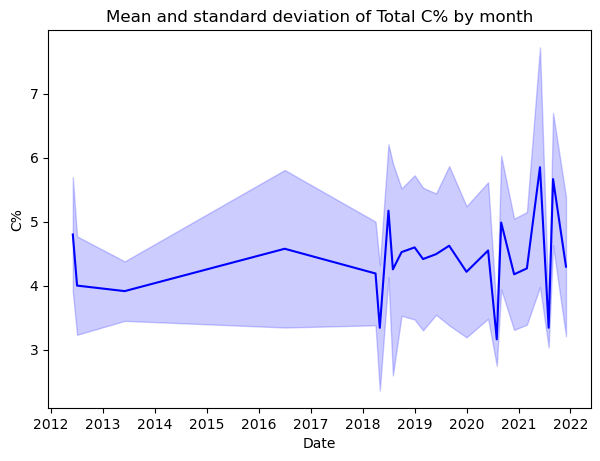

In [128]:
## Plot
plt.figure(figsize=(7, 5), dpi=100)
plt.plot(group_by_month['Month-year'], group_by_month['mean'], color = 'blue')
plt.fill_between(group_by_month['Month-year'], (group_by_month['mean']+group_by_month['std']), 
                 (group_by_month['mean']-group_by_month['std']), alpha = 0.2, color = 'blue')
plt.title("Mean and standard deviation of Total C% by month")
plt.xlabel("Date")
plt.ylabel("C%")
plt.savefig('average_C_by_month_sd.png', dpi=300)

plt.show()

In [129]:
# Group by year and count
group_year = files_df[['Year', 'C_total_%w/w']].groupby(['Year']).agg(['min', 'mean', 'median', 'max','std', 'count']).reset_index()
group_year.columns = group_year.columns.to_flat_index()
group_year.rename(columns = {('Year', ''): 'Year', ('C_total_%w/w', 'min'): 'min',
                               ('C_total_%w/w', 'mean'): 'mean', ('C_total_%w/w', 'median'): 'median',
                               ('C_total_%w/w', 'max'): 'max',('C_total_%w/w', 'std'): 'std', 
                               ('C_total_%w/w', 'count'): 'count'}, inplace = True)

group_year['Year'] = group_year['Year'].astype('datetime64[ns]')
group_year

,Year,min,mean,median,max,std,count
0,2012-01-01,2.690,4.616015,4.657,10.040,0.928946,263
1,2013-01-01,2.685,3.913382,3.891,5.165,0.464701,89
2,2016-01-01,2.011,4.575089,4.275,7.519,1.230368,347
3,2018-01-01,2.660,4.499365,4.280,7.350,1.096307,63
4,2019-01-01,2.840,4.529880,4.190,6.810,1.093772,83
5,2020-01-01,2.500,4.344000,4.165,6.840,1.047984,80
6,2021-01-01,2.760,4.845125,4.655,8.940,1.483824,80


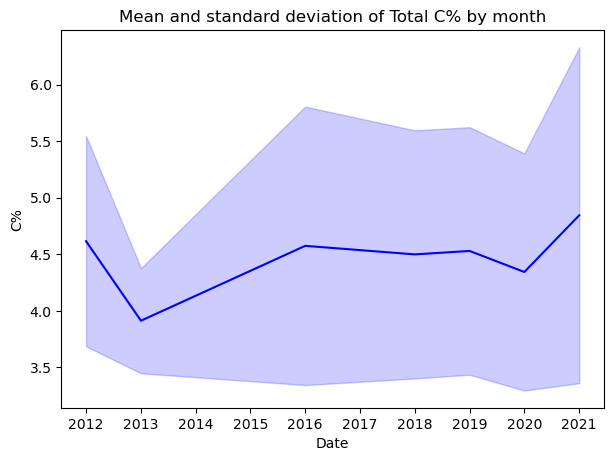

In [130]:
## Plot
plt.figure(figsize=(7, 5), dpi=100)
plt.plot(group_year['Year'], group_year['mean'], color = 'blue')
plt.fill_between(group_year['Year'], (group_year['mean']+group_year['std']), 
                 (group_year['mean']-group_year['std']), alpha = 0.2, color = 'blue')
plt.title("Mean and standard deviation of Total C% by month")
plt.xlabel("Date")
plt.ylabel("C%")
plt.savefig('average_C_by_year.png', dpi=300)

plt.show()

In [131]:
diff = group_year['mean'][6] - group_year['mean'][0]
print('The change in C% in nine years was {}%'.format(round(diff,2)))

The change in C% in nine years was 0.23%


In [132]:
diff_month = group_by_month['mean'][22] - group_by_month['mean'][0]
print('The change in C% in nine years was {}%'.format(round(diff,2)))

The change in C% in nine years was 0.23%


In [133]:
files_df.to_csv('dataset_final_date_RR.csv', index = False)

### Save files by month-year

In [134]:
for i in range(len(group_by_month)):
    files = files_df.loc[files_df['Month-year'] == str(group_by_month['Month-year'][i]).split()[0]]
    files.to_csv("files_{}.csv".format(str(group_by_month['Month-year'][i]).split()[0]), index = False)

### Join datasets with Landsat spectral bands

In [3]:
## To open files from computer
f2 = glob.glob('files*RS*csv')
f2

['files_2012_with_RS_2012.csv',
 'files_2013-06-01_with_RS_2013-06-04.csv',
 'files_2016-07-01_with_RS_2016-08-15.csv',
 'files_2018_with_RS_2018.csv',
 'files_2019-01-01_with_RS_2019-03-26.csv',
 'files_2019-03-01_with_RS_2019-03-26.csv',
 'files_2019-06-01_with_RS_2019-03-26.csv',
 'files_2019-09-01_with_RS_2019-09-18.csv',
 'files_2020-01-01_with_RS_2020-01-15.csv',
 'files_2020-09-01_with_RS_2020-09-27.csv',
 'files_2020_with_RS_2020.csv',
 'files_2021-03-01_with_RS_2021-02-27.csv',
 'files_2021-06-01_with_RS_2021-07-21.csv',
 'files_2021-08-01_with_RS_2021-07-21.csv',
 'files_2021-09-01_with_RS_2021-09-07.csv',
 'files_2021-12-01_with_RS_2021-09-07.csv']

In [4]:
# Join all the files
f2_df = pd.DataFrame(pd.concat([pd.read_csv(f, sep=';') for f in f2], axis = 0))
f2_df

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Month-year,Year,Sample_time,Easting,Northing,X,Y,pH,BD_gcm3,OM_%w/w,N_total_%w/w,C_total_%w/w,conductivity_uScm,B2,B3,B4,B5,B6,B7,NDVI,GNDVI,NDMI,EVI,BSI
0,FP003,1,50.0,Pecketsford,6/6/2012,2012-06,2012,12:00:00,265632.0000,99300.00000,-3.907212,50.777660,5.18,0.916,10.1,0.510,4.742,NaN,8822,9698,9003,22351,14113,10267,0.42572,0.39480,0.22592,1.65165,-0.14841
1,FP003,2,50.0,Pecketsford,6/6/2012,2012-06,2012,12:00:00,265625.0000,99275.00000,-3.907302,50.777434,5.23,0.943,10.4,0.550,4.980,NaN,8555,9519,8860,24651,13799,10119,0.47122,0.44284,0.28224,1.66934,-0.18879
2,FP003,7,50.0,Pecketsford,6/6/2012,2012-06,2012,12:00:00,265575.0000,99225.00000,-3.907992,50.776973,5.54,0.948,11.8,0.640,5.610,NaN,8467,9340,8435,25263,13904,9822,0.49938,0.46016,0.29001,1.88060,-0.20316
3,FP003,9,50.0,Pecketsford,6/6/2012,2012-06,2012,12:00:00,265625.0000,99225.00000,-3.907283,50.776985,5.12,0.857,10.9,0.540,4.510,NaN,8289,9161,8294,27838,13695,9674,0.54091,0.50480,0.34052,1.92101,-0.24327
4,FP003,17,50.0,Pecketsford,6/6/2012,2012-06,2012,12:00:00,265575.0000,99175.00000,-3.907974,50.776524,5.68,0.946,11.5,0.590,5.340,NaN,8290,9341,8294,27537,13695,9524,0.53705,0.49341,0.33571,1.91465,-0.23935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,NW752-3S,2012,NaN,Middle Wyke Moor,9/12/2021,2021-12,2021,12:00:00,266286.9323,97739.51404,-3.906881,50.767098,5.90,NaN,11.0,0.519,5.020,1992.0,8915,10114,10382,19774,16648,12299,0.31145,0.32321,0.08583,0.93162,-0.02977
16,NW752-3S,2010,NaN,Lower Wyke Moor,9/12/2021,2021-12,2021,12:00:00,266451.1332,97788.73835,-3.906172,50.767110,6.10,NaN,10.0,0.423,4.270,2006.0,9156,10348,10967,19271,17204,12830,0.27462,0.30126,0.05667,0.78627,-0.00452
17,NW752-3S,2013,NaN,Dairy South,9/12/2021,2021-12,2021,12:00:00,266152.0651,97968.50154,-3.905464,50.767122,6.10,NaN,10.6,0.499,4.710,1992.0,9060,10166,10585,19504,16460,12257,0.29642,0.31473,0.08464,0.88962,-0.02732
18,NW752-3S,2016,NaN,Dairy East,9/12/2021,2021-12,2021,12:00:00,266335.1610,98244.47438,-3.904755,50.767133,6.00,NaN,9.6,0.445,4.210,1988.0,9145,10285,10809,18750,17287,12919,0.26865,0.29154,0.04060,0.79358,0.00359


In [233]:
f2_df.to_csv("final_dataRR_with_RS.csv", index = False)

#### Group by field and plot

In [225]:
dat_by_field = f2_df.groupby(['Field']).mean().sort_values(by = 'C_total_%w/w', ascending = False).reset_index()
dat_by_field.head()

,Field,SP_ID,sample_distance (m),Year,Easting,Northing,X,Y,pH,BD_gcm3,OM_%w/w,N_total_%w/w,C_total_%w/w,conductivity_uScm,B2,B3,B4,B5,B6,B7,NDVI,GNDVI,NDMI,EVI,BSI
0,Burrows,1092.352941,50.000000,2017.588235,265643.794397,98316.448165,-3.902898,50.771665,5.902941,0.912632,14.162941,0.627618,6.416971,2054.714286,8381.647059,9537.852941,8967.000000,22701.970588,15329.852941,11178.500000,0.429009,0.403902,0.191504,1.446234,-0.121803
1,Orchard Dean North,2007.000000,NaN,2019.600000,265678.190660,98112.257792,-3.903474,50.769912,5.773333,NaN,13.460000,0.657600,6.251333,2043.266667,8454.266667,9558.466667,9066.600000,21232.666667,14954.333333,11087.600000,0.393698,0.371897,0.168979,1.362244,-0.103961
2,Dairy North,1364.340909,30.172414,2016.681818,266282.975770,98356.773390,-3.903942,50.772093,5.775909,0.920345,13.764773,0.665250,6.171045,2058.866667,8440.863636,9639.477273,9069.454545,22856.454545,15394.568182,11180.204545,0.428680,0.403742,0.193222,1.437535,-0.122107
3,Orchard Dean - Orchard Dean South,563.000000,50.000000,2016.000000,265650.000000,98000.000000,-3.906401,50.766919,5.628333,0.855833,11.905417,0.613917,6.023250,NaN,8653.833333,9926.000000,9877.166667,20639.250000,15912.833333,11848.416667,0.352433,0.349861,0.129924,1.091870,-0.064273
4,Orchard Dean South,2008.000000,NaN,2019.600000,265666.148080,98008.840876,-3.903900,50.769935,5.946667,NaN,12.953333,0.619333,5.988000,2042.533333,8471.200000,9591.600000,9140.666667,21622.933333,15209.666667,11296.466667,0.395613,0.375846,0.168383,1.354339,-0.104426


In [226]:
dat_by_field['C_total_%w/w'] = dat_by_field['C_total_%w/w'].round(2)

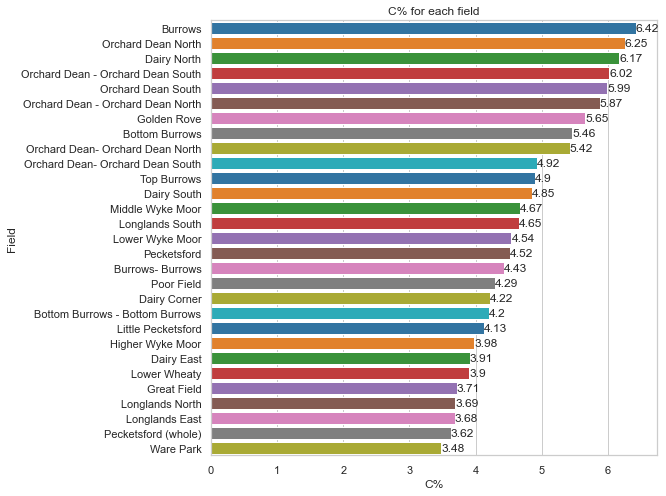

In [227]:
sns.set(style="whitegrid", font_scale=1)
ax = sns.barplot(y = dat_by_field['Field'], x = dat_by_field['C_total_%w/w'], palette = "tab10")
plt.title('C% for each field')
ax.bar_label(ax.containers[0])
plt.xlabel('C%')
plt.show()

#### Select fields and plot by years

In [228]:
group_by_field_year = f2_df.groupby(['Year','Field']).mean().reset_index()
group_by_field_year['C_total_%w/w'] = group_by_field_year['C_total_%w/w'].round(2)
group_by_field_year

,Year,Field,SP_ID,sample_distance (m),Easting,Northing,X,Y,pH,BD_gcm3,OM_%w/w,N_total_%w/w,C_total_%w/w,conductivity_uScm,B2,B3,B4,B5,B6,B7,NDVI,GNDVI,NDMI,EVI,BSI
0,2012,Bottom Burrows - Bottom Burrows,312.666667,50.0,265508.333333,98400.000000,-3.901105,50.765994,5.616667,0.885833,8.616667,0.488500,4.20,NaN,8438.000000,9364.500000,8502.666667,25743.666667,14503.333333,9967.833333,0.500725,0.463983,0.276867,1.826290,-0.194298
1,2012,Burrows- Burrows,373.666667,50.0,265650.000000,98314.583333,-3.903578,50.766572,5.664167,0.906917,8.958333,0.540917,4.43,NaN,8456.958333,9587.708333,8756.166667,25196.500000,15050.708333,10424.875000,0.482987,0.447645,0.251279,1.689177,-0.170965
2,2012,Dairy Corner,845.600000,50.0,266320.000000,98085.000000,-3.897062,50.766269,5.576000,0.857200,9.560000,0.537200,4.29,NaN,8280.800000,9292.800000,8512.600000,26368.600000,13978.800000,9819.600000,0.510648,0.477576,0.305984,1.769592,-0.212442
3,2012,Dairy East,962.714286,50.0,266328.571429,98239.285714,-3.898737,50.762349,5.404286,0.906857,11.971429,0.624286,5.51,NaN,8409.571429,9523.857143,8522.857143,24728.857143,13818.571429,9861.285714,0.486529,0.443149,0.282379,1.782291,-0.194180
4,2012,Dairy North,1024.333333,50.0,266291.666667,98366.666667,-3.902897,50.773759,5.785000,0.920000,12.466667,0.655333,5.88,NaN,8453.833333,9588.000000,8797.333333,24379.166667,14595.500000,10241.500000,0.468747,0.434552,0.250233,1.636845,-0.167497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,2021,Orchard Dean North,2007.000000,NaN,265678.191100,98112.256320,-3.904724,50.770731,5.725000,NaN,14.375000,0.688750,6.80,2010.75,8665.750000,9957.750000,9655.750000,21082.000000,15616.500000,11546.500000,0.358415,0.346135,0.140715,1.164757,-0.077545
125,2021,Orchard Dean South,2008.000000,NaN,265666.146800,98008.841460,-3.905815,50.771388,5.775000,NaN,13.300000,0.635250,6.28,2002.25,8811.750000,10079.000000,10006.500000,20788.250000,16121.250000,11977.500000,0.338175,0.335732,0.119370,1.064900,-0.059785
126,2021,Pecketsford (whole),2001.000000,NaN,265640.471500,99099.200630,-3.902333,50.770770,6.525000,NaN,7.400000,0.362500,3.43,2031.50,8772.750000,10083.000000,9617.750000,22702.250000,15603.750000,11328.750000,0.393103,0.374255,0.176663,1.317060,-0.106090
127,2021,Poor Field,2003.000000,NaN,265547.765300,98594.875950,-3.901503,50.769997,6.425000,NaN,8.300000,0.392750,3.66,2026.75,8567.250000,9704.250000,9442.000000,21087.750000,13966.750000,10583.000000,0.363460,0.352973,0.188065,1.219972,-0.110528


In [229]:
list_vc = group_by_field_year.Field.value_counts().loc[lambda x: x>4].index.to_list()
list_vc

['Longlands East',
 'Longlands South',
 'Longlands North',
 'Higher Wyke Moor',
 'Poor Field',
 'Middle Wyke Moor',
 'Lower Wheaty',
 'Ware Park',
 'Lower Wyke Moor',
 'Great Field',
 'Golden Rove',
 'Dairy South',
 'Dairy North',
 'Dairy East',
 'Dairy Corner',
 'Burrows',
 'Bottom Burrows']

In [230]:
group_by_field_year2 = group_by_field_year[group_by_field_year['Field'].isin(list_vc)]
group_by_field_year2.to_csv('group_field_year_mais4.csv', index = False)
group_by_field_year2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 2 to 128
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 103 non-null    int64  
 1   Field                103 non-null    object 
 2   SP_ID                103 non-null    float64
 3   sample_distance (m)  35 non-null     float64
 4   Easting              103 non-null    float64
 5   Northing             103 non-null    float64
 6   X                    103 non-null    float64
 7   Y                    103 non-null    float64
 8   pH                   103 non-null    float64
 9   BD_gcm3              32 non-null     float64
 10  OM_%w/w              103 non-null    float64
 11  N_total_%w/w         103 non-null    float64
 12  C_total_%w/w         103 non-null    float64
 13  conductivity_uScm    68 non-null     float64
 14  B2                   103 non-null    float64
 15  B3                   103 non-null    flo

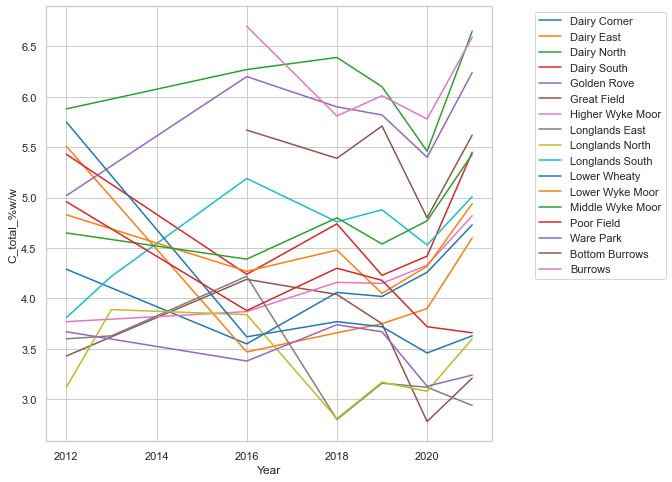

In [212]:
sns.set(style="whitegrid", font_scale=1)
lp = sns.lineplot('Year', 'C_total_%w/w', ci=None, 
             hue='Field', data=group_by_field_year2, palette = "tab10")
lp.legend(loc='upper right', bbox_to_anchor=(1.4, 1))

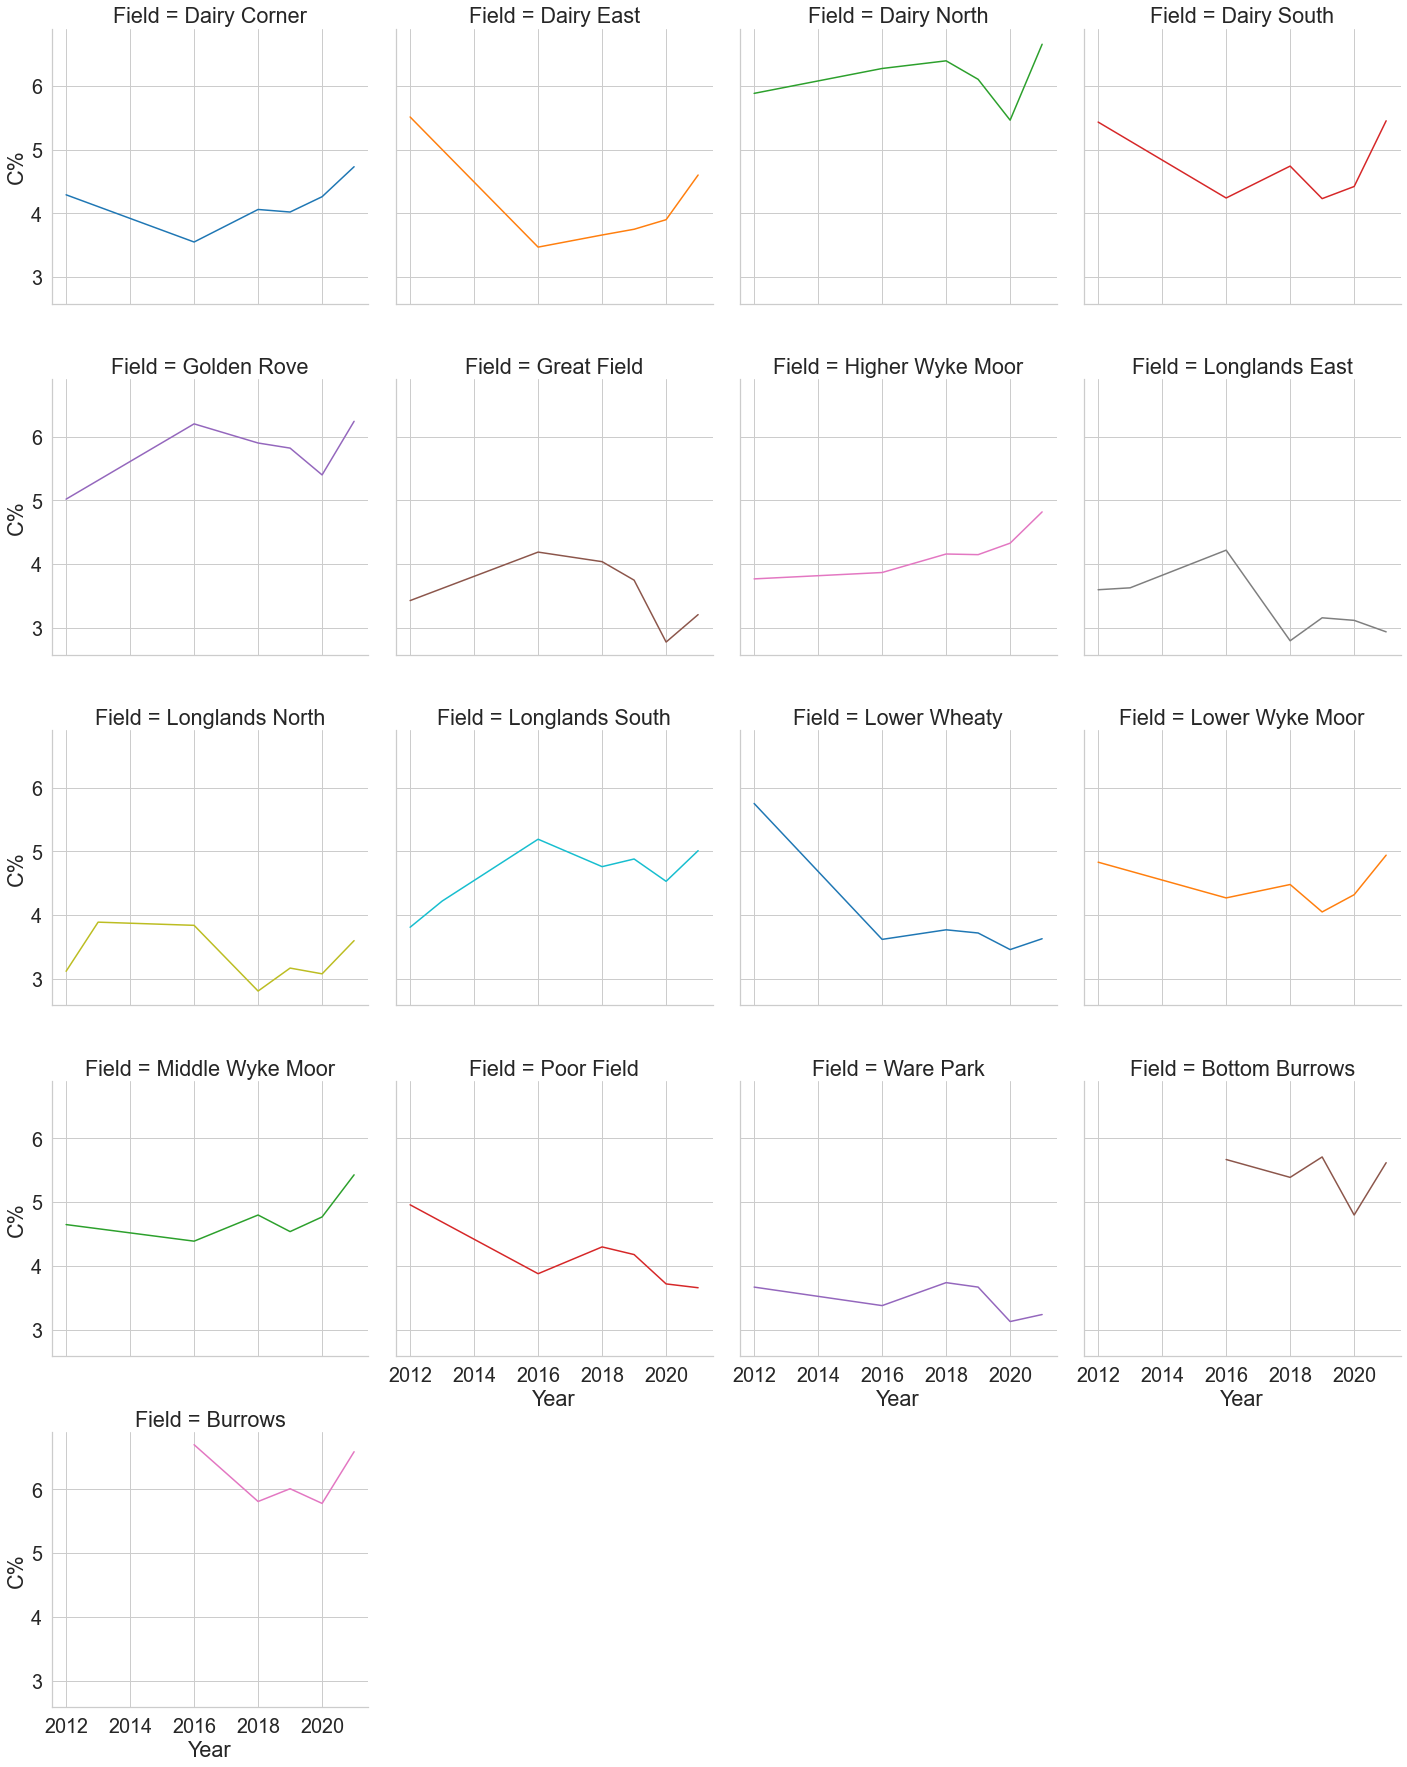

In [203]:
#sns.plotting_context("talk")
#sns.set_theme(style="whitegrid")
sns.set(style="whitegrid", font_scale=1.8)
fig = sns.relplot(data = group_by_field_year2, x = 'Year', y = 'C_total_%w/w', col="Field", kind="line", col_wrap = 4, 
            hue = 'Field', palette = "tab10", legend = False)
fig.set_ylabels("C%", clear_inner=False)
fig.savefig('C%_by_field.png', dpi = 700)

#### Different groupings

In [222]:
## Group by year and field, all columns, check corr and save
group_by_field_year3 = f2_df.groupby(['Year','Field']).mean().reset_index()
group_by_field_year3.to_csv('group_year_field.csv', index = False)
group_by_field_year3.drop(['Year', 'Field', 'SP_ID', 'sample_distance (m)', 'Easting', 'Northing', 
                           'X', 'Y', 'pH', 'BD_gcm3', 'OM_%w/w', 'N_total_%w/w', 'conductivity_uScm'], axis = 1).corr()

,C_total_%w/w,B2,B3,B4,B5,B6,B7,NDVI,GNDVI,NDMI,EVI,BSI
C_total_%w/w,1.000000,0.173589,0.106386,0.125752,-0.060776,0.148712,0.134453,-0.091345,-0.085497,-0.106708,-0.081742,0.103985
B2,0.173589,1.000000,0.823709,0.865567,-0.339671,0.718160,0.653709,-0.572219,-0.534773,-0.557794,-0.596427,0.579799
B3,0.106386,0.823709,1.000000,0.793595,-0.092792,0.540788,0.471310,-0.356168,-0.335780,-0.308779,-0.485806,0.354820
B4,0.125752,0.865567,0.793595,1.000000,-0.601891,0.848212,0.866448,-0.815967,-0.778120,-0.785527,-0.888010,0.815992
B5,-0.060776,-0.339671,-0.092792,-0.601891,1.000000,-0.609654,-0.774503,0.947897,0.964191,0.920021,0.868615,-0.920564
B6,0.148712,0.718160,0.540788,0.848212,-0.609654,1.000000,0.961668,-0.770895,-0.724803,-0.868583,-0.820603,0.865884
B7,0.134453,0.653709,0.471310,0.866448,-0.774503,0.961668,1.000000,-0.894840,-0.860646,-0.952120,-0.924403,0.953823
NDVI,-0.091345,-0.572219,-0.356168,-0.815967,0.947897,-0.770895,-0.894840,1.000000,0.994010,0.969339,0.970762,-0.979356
GNDVI,-0.085497,-0.534773,-0.335780,-0.778120,0.964191,-0.724803,-0.860646,0.994010,1.000000,0.955388,0.953847,-0.965910
NDMI,-0.106708,-0.557794,-0.308779,-0.785527,0.920021,-0.868583,-0.952120,0.969339,0.955388,1.000000,0.943019,-0.997604


In [ ]:
## Group by year and field, all columns, check corr and save
group_by_field_year3 = f2_df.groupby(['Year','Field']).mean().reset_index()
group_by_field_year3.to_csv('group_year_field.csv', index = False)
group_by_field_year.drop(['Year', 'Field', 'SP_ID', 'sample_distance (m)', 'Easting', 'Northing', 
                           'X', 'Y', 'pH', 'BD_gcm3', 'OM_%w/w', 'N_total_%w/w', 'conductivity_uScm'], axis = 1).corr()

In [232]:
group_by_field_year3.drop(['Year', 'Field', 'SP_ID', 'sample_distance (m)', 'Easting', 'Northing', 
                           'X', 'Y', 'pH', 'BD_gcm3', 'OM_%w/w', 'N_total_%w/w', 'conductivity_uScm'], axis = 1).corr()

,C_total_%w/w,B2,B3,B4,B5,B6,B7,NDVI,GNDVI,NDMI,EVI,BSI
C_total_%w/w,1.000000,0.173589,0.106386,0.125752,-0.060776,0.148712,0.134453,-0.091345,-0.085497,-0.106708,-0.081742,0.103985
B2,0.173589,1.000000,0.823709,0.865567,-0.339671,0.718160,0.653709,-0.572219,-0.534773,-0.557794,-0.596427,0.579799
B3,0.106386,0.823709,1.000000,0.793595,-0.092792,0.540788,0.471310,-0.356168,-0.335780,-0.308779,-0.485806,0.354820
B4,0.125752,0.865567,0.793595,1.000000,-0.601891,0.848212,0.866448,-0.815967,-0.778120,-0.785527,-0.888010,0.815992
B5,-0.060776,-0.339671,-0.092792,-0.601891,1.000000,-0.609654,-0.774503,0.947897,0.964191,0.920021,0.868615,-0.920564
B6,0.148712,0.718160,0.540788,0.848212,-0.609654,1.000000,0.961668,-0.770895,-0.724803,-0.868583,-0.820603,0.865884
B7,0.134453,0.653709,0.471310,0.866448,-0.774503,0.961668,1.000000,-0.894840,-0.860646,-0.952120,-0.924403,0.953823
NDVI,-0.091345,-0.572219,-0.356168,-0.815967,0.947897,-0.770895,-0.894840,1.000000,0.994010,0.969339,0.970762,-0.979356
GNDVI,-0.085497,-0.534773,-0.335780,-0.778120,0.964191,-0.724803,-0.860646,0.994010,1.000000,0.955388,0.953847,-0.965910
NDMI,-0.106708,-0.557794,-0.308779,-0.785527,0.920021,-0.868583,-0.952120,0.969339,0.955388,1.000000,0.943019,-0.997604


### Join datasets with Sentinel-2 spectral bands

In [66]:
## To open files from computer
f3 = glob.glob('files*RS*S2A*csv')
f3

['files_2016-07-01_with_RS_2016-07-19_S2A.csv',
 'files_2018-04-01_with_RS_2018-04-20_S2A.csv',
 'files_2018-05-01_with_RS_2018-05-05_S2A.csv',
 'files_2018-07-01_with_RS_2018-07-19_S2A.csv',
 'files_2018-08-01_with_RS_2018-09-27_S2A.csv',
 'files_2018-10-01_with_RS_2018-09-27_S2A.csv',
 'files_2019-03-01_with_RS_2019-03_26-S2A.csv',
 'files_2019-06-01_with_RS_2019-07-04_S2A.csv',
 'files_2019-09-01_with_RS_2019-08-23_S2A.csv',
 'files_2020-01-01_with_RS_2020-01-15_S2A.csv',
 'files_2020-06-01_with_RS_2020-06-23_S2A.csv',
 'files_2020-08-01_with_RS_2020-08-12_S2A.csv',
 'files_2020-09-01_with_RS_2020-09-21_S2A.csv',
 'files_2020-12-01_with_RS_2020-12-20_S2A.csv',
 'files_2021-03-01_with_RS_2021-03-30_S2A.csv',
 'files_2021-06-01_with_RS_2021-06-13_S2A.csv',
 'files_2021-08-01_with_RS_2021-07-18_S2A.csv',
 'files_2021-09-01_with_RS_2021-07-18_S2A.csv',
 'files_2021-12-01_with_RS_2021-12-05_S2A.csv']

In [91]:
# Clean and save all the files 
f0 = pd.read_csv( 'files_2020-12-01_with_RS_2020-12-20_S2A.csv', sep = ',')
f0.rename(columns = {'sample_dis': 'sample_distance (m)', 'Sample_dat': 'Sample_Date', 'Sample_tim': 'Sample_time', 
                     'conductivi':'conductivity_uScm', 'C_total_%w':'C_total_%w/w', 'N_total_%w': 'N_total_%w/w', '7': 'B7'}, inplace  =True)
f0.to_csv( 'files_2020-12-01_with_RS_2020-12-20_S2A.csv', index = False)

In [92]:
# Join all csv
f3_df = pd.DataFrame(pd.concat([pd.read_csv(f, sep = ',') for f in f3], axis = 0))
f3_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632 entries, 0 to 19
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Experiment           632 non-null    object 
 1   SP_ID                632 non-null    int64  
 2   sample_distance (m)  347 non-null    float64
 3   Field                632 non-null    object 
 4   Sample_Date          632 non-null    object 
 5   Month-year           632 non-null    object 
 6   Year                 632 non-null    int64  
 7   Sample_time          632 non-null    object 
 8   Easting              632 non-null    float64
 9   Northing             632 non-null    float64
 10  X                    632 non-null    float64
 11  Y                    632 non-null    float64
 12  pH                   631 non-null    float64
 13  BD_gcm3              343 non-null    float64
 14  OM_%w/w              632 non-null    float64
 15  N_total_%w/w         632 non-null    floa

In [100]:
# Convert to integer and round to 2 decimals
cols = ['B2', 'B3','B4', 'B5','B6', 'B7','B8','B8A','B11', 'B12']
f3_df[cols] = f3_df[cols].astype(int)
cols2 = ['NDVI','GNDVI','NDRE', 'NDMI', 'EVI', 'BSI']
f3_df[cols2] = f3_df[cols2].round(2)
f3_df.to_csv('all_data_Sentinel.csv', index = False)
f3_df.head()

,Experiment,SP_ID,sample_distance (m),Field,Sample_Date,Month-year,Year,Sample_time,Easting,Northing,X,Y,pH,BD_gcm3,OM_%w/w,N_total_%w/w,C_total_%w/w,conductivity_uScm,B2,B3,B4,B5,B6,B7,B8,B8A,B11,B12,NDVI,GNDVI,NDRE,NDMI,EVI,BSI
0,FP059,257,50.0,Ware Park,1/7/2016,2016-07,2016,14:10:00,265825.0,98675.0,-3.907212,50.777660,5.92,1.09,6.59,0.368,3.116,NaN,944,865,645,1148,3141,4159,3782,4765,1964,881,0.76,0.69,0.21,0.42,0.89,-0.37
1,FP059,269,50.0,Ware Park,1/7/2016,2016-07,2016,11:35:00,265725.0,98625.0,-3.907302,50.777434,5.86,0.66,7.26,0.391,3.491,NaN,898,956,586,1238,3038,3869,3704,4311,1996,839,0.76,0.64,0.17,0.37,0.84,-0.34
2,FP059,271,50.0,Ware Park,1/7/2016,2016-07,2016,14:25:00,265775.0,98625.0,-3.907992,50.776973,5.46,1.01,8.26,0.456,3.957,NaN,883,817,513,1120,3315,4409,4391,5041,1969,835,0.82,0.72,0.21,0.44,0.98,-0.41
3,FP059,273,50.0,Ware Park,1/7/2016,2016-07,2016,11:55:00,265825.0,98625.0,-3.907283,50.776985,5.59,1.07,6.62,0.355,3.149,NaN,922,965,585,1245,3105,3913,3885,4482,1962,800,0.77,0.65,0.18,0.39,0.88,-0.36
4,FP059,280,50.0,Ware Park,1/7/2016,2016-07,2016,11:20:00,265775.0,98575.0,-3.907974,50.776524,5.92,1.04,6.32,0.343,3.038,NaN,917,978,585,1265,3178,3965,3886,4513,1989,825,0.77,0.64,0.17,0.39,0.88,-0.36


### Separate files by year

Interesting fact was that the correlation of C% with the spectral bands was far more better by year rather than considering all the years together. That's why I am separating the files by year to build separate models for each year.

In [110]:
# Sentinel
file_2016 = f3_df.loc[f3_df['Year'] == 2016]
file_2016.to_csv("data2016_sentinel.csv", index = False)
file_2018 = f3_df.loc[f3_df['Year'] == 2018]
file_2018.to_csv("data2018_sentinel.csv", index = False)
file_2019 = f3_df.loc[f3_df['Year'] == 2019]
file_2019.to_csv("data2019_sentinel.csv", index = False)
file_2020 = f3_df.loc[f3_df['Year'] == 2020]
file_2020.to_csv("data2020_sentinel.csv", index = False)
file_2021 = f3_df.loc[f3_df['Year'] == 2021]
file_2021.to_csv("data2021_sentinel.csv", index = False)

In [188]:
# Landsat
f4_df = pd.read_csv("all_data_landsat.csv", sep = ';')
f4_df['Year'].unique()

array([2012, 2013, 2016, 2018, 2019, 2020, 2021], dtype=int64)

In [190]:
land_2012 = f4_df.loc[f4_df['Year'] == 2012]
land_2012.to_csv("data2016_landsat.csv", index = False)
land_2013 = f4_df.loc[f4_df['Year'] == 2013]
land_2013.to_csv("data2016_landsat.csv", index = False)
land_2016 = f4_df.loc[f4_df['Year'] == 2016]
land_2016.to_csv("data2016_landsat.csv", index = False)
land_2018 = f4_df.loc[f4_df['Year'] == 2018]
land_2018.to_csv("data2018_landsat.csv", index = False)
land_2019 = f4_df.loc[f4_df['Year'] == 2019]
land_2019.to_csv("data2019_landsat.csv", index = False)
land_2020 = f4_df.loc[f4_df['Year'] == 2020]
land_2020.to_csv("data2020_landsat.csv", index = False)
land_2021 = f4_df.loc[f4_df['Year'] == 2021]
land_2021.to_csv("data2021_landsat.csv", index = False)

In [112]:
cols3 = ['C_total_%w/w','OM_%w/w','B2','B3', 'B4', 'B5', 'B6', 'B7','B8', 'B8A', 'B11', 'B12', 'NDVI', 'GNDVI', 'NDRE', 'NDMI', 'EVI','BSI']

In [165]:
file_2018[cols3].corr()

,C_total_%w/w,OM_%w/w,B2,B3,B4,B5,B6,B7,B8,B8A,B11,B12,NDVI,GNDVI,NDRE,NDMI,EVI,BSI
C_total_%w/w,1.000000,0.962328,0.239082,0.111283,0.218989,0.065139,-0.087807,-0.028926,-0.021235,0.005244,0.296892,0.306038,-0.223441,-0.120744,0.279261,-0.251081,-0.071915,0.247267
OM_%w/w,0.962328,1.000000,0.218652,0.092820,0.204349,0.050372,-0.087136,-0.029699,-0.024547,-0.003670,0.285473,0.295063,-0.216772,-0.113243,0.240604,-0.248317,-0.075981,0.243711
B2,0.239082,0.218652,1.000000,0.912605,0.932470,0.837287,0.342366,0.355847,0.409355,0.454709,0.742762,0.751142,-0.792794,-0.684114,0.419318,-0.244675,0.083327,0.292144
B3,0.111283,0.092820,0.912605,1.000000,0.889126,0.942043,0.503366,0.456054,0.565037,0.540738,0.747532,0.721501,-0.772915,-0.801525,0.162636,-0.204253,0.166482,0.266974
B4,0.218989,0.204349,0.932470,0.889126,1.000000,0.823306,0.135498,0.111969,0.198190,0.209712,0.810998,0.842111,-0.948604,-0.843248,0.237408,-0.479000,-0.211188,0.536040
B5,0.065139,0.050372,0.837287,0.942043,0.823306,1.000000,0.531573,0.460560,0.550487,0.545742,0.693099,0.664428,-0.703708,-0.725948,0.085292,-0.153511,0.191599,0.218279
B6,-0.087807,-0.087136,0.342366,0.503366,0.135498,0.531573,1.000000,0.980092,0.950332,0.962234,0.084332,-0.026089,0.114443,0.018404,0.010969,0.616266,0.887308,-0.582557
B7,-0.028926,-0.029699,0.355847,0.456054,0.111969,0.460560,0.980092,1.000000,0.942540,0.980287,0.052209,-0.051439,0.161918,0.108082,0.149825,0.658799,0.922773,-0.633810
B8,-0.021235,-0.024547,0.409355,0.565037,0.198190,0.550487,0.950332,0.942540,1.000000,0.960078,0.221021,0.107403,0.036393,-0.071254,0.168615,0.501054,0.868563,-0.471439
B8A,0.005244,-0.003670,0.454709,0.540738,0.209712,0.545742,0.962234,0.980287,0.960078,1.000000,0.161443,0.058926,0.065686,0.028373,0.276669,0.585577,0.905976,-0.557533


In [180]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [183]:
df = f3_df
compute_vif(cols3)

,Variable,VIF
0,C_total_%w/w,11.743486
1,OM_%w/w,11.899524
2,B2,203.840290
3,B3,249.964153
4,B4,360.173902
5,B5,13.812668
6,B6,356.470878
7,B7,134.740618
8,B8,24.761039
9,B8A,502.192262
